
#Project Team-18

### Contributions
Uday Bhaskar Voora <br>
Anuraag Reddy Kommareddy
# Step 1: Load the Data/Filtering 

I will first import all necessary libraries along with the data file so that we have everything needed to begin the analysis.

In [72]:
# Import necessary libraries
# Libraries for data exploration
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import statsmodels as sm

# Libraries for the  data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.lines import Line2D
import matplotlib.font_manager
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm

#hiding warnings 
import warnings
warnings.filterwarnings('ignore')

# Libraries for the modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.stattools import adfuller

In [73]:
# Input dataset file into the environment
data = pd.read_csv('C:/Users/udayv/Downloads/zillow_dataset_2023.csv')
data=data.drop("StateName",axis=1)
data=data.drop("RegionType", axis=1)
# Data represntaion of first 5 rows
data.head()
#data.iloc[:, 226] 

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210998.274855,211181.402299,211670.740731,...,477993.980265,475781.230089,474477.961277,473439.827111,474653.524348,476661.984057,479794.936271,482597.324009,485083.056594,486910.114726
1,61148,2,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,138236.106220,138806.645686,139192.269231,...,526688.496534,529065.655134,531291.205373,534197.368329,538377.145099,543770.909659,549747.786643,555895.280469,561828.200137,568194.498423
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103318.630160,103332.906580,103206.084331,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,149035.558030,150516.820047,151629.424703,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,101939.033374,101896.281180,101715.263581,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440


# Step-2: Preprocessnig the Data

As in the data sections we see that data doesn't matter am just popping the date so the new format of date will be yyyy-mm instead of yyyy-mm-dd  

In [74]:
# Cleaning the data
data.columns = [col[0:7] if isinstance(col, str) and col not in ['RegionID', 'SizeRank', 'RegionName', 'State', 'City', 'Metro', 'CountyName'] else col for col in data.columns]
data.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,2000-01,2000-02,2000-03,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210998.274855,211181.402299,211670.740731,...,477993.980265,475781.230089,474477.961277,473439.827111,474653.524348,476661.984057,479794.936271,482597.324009,485083.056594,486910.114726
1,61148,2,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,138236.106220,138806.645686,139192.269231,...,526688.496534,529065.655134,531291.205373,534197.368329,538377.145099,543770.909659,549747.786643,555895.280469,561828.200137,568194.498423
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103318.630160,103332.906580,103206.084331,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,149035.558030,150516.820047,151629.424703,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,101939.033374,101896.281180,101715.263581,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440


In [75]:
# Convert columns containing dates to datetime and date will be same for all 01
def get_datetime(df):
    return pd.to_datetime(df.columns.values[7:],format='%Y-%m')
data.columns = list(data.columns[:7]) + list(get_datetime(data))
data.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210998.274855,211181.402299,211670.740731,...,477993.980265,475781.230089,474477.961277,473439.827111,474653.524348,476661.984057,479794.936271,482597.324009,485083.056594,486910.114726
1,61148,2,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,138236.106220,138806.645686,139192.269231,...,526688.496534,529065.655134,531291.205373,534197.368329,538377.145099,543770.909659,549747.786643,555895.280469,561828.200137,568194.498423
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103318.630160,103332.906580,103206.084331,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,149035.558030,150516.820047,151629.424703,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,101939.033374,101896.281180,101715.263581,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440


Now let's look at the different variables and check if there are any null variables.
If found some we will remove all the null values or replace them appropriately with NAN values.

In [76]:
# Check if we have any null values in our first 7 categorical columns
data.iloc[:,0:7].isnull().sum()

RegionID         0
SizeRank         0
RegionName       0
State            0
City          1087
Metro         5702
CountyName       0
dtype: int64

We can see that the City and Mtero have more than 1000+ and 5000+ null values, as these are categorical variables we will replace them with not applicable.

In [77]:
# Replace null values and double check our code worked
data['City'].fillna('Not Applicable', inplace=True)
data['Metro'].fillna('Not Applicable', inplace=True)
data.iloc[:,0:7].isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
State         0
City          0
Metro         0
CountyName    0
dtype: int64

now that the first 7 columns are free of null values we will now look at the whole columns.

In [78]:
data.iloc[:,7:].isnull().sum()

2000-01-01    13465
2000-02-01    13399
2000-03-01    13385
2000-04-01    13366
2000-05-01    13303
              ...  
2023-05-01      469
2023-06-01      468
2023-07-01      467
2023-08-01      467
2023-09-01        0
Length: 285, dtype: int64

In [79]:
# Remove any rows with null values
data.dropna(inplace=True, subset=list(data.columns[199:]))

In [80]:
data.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,210998.274855,211181.402299,211670.740731,...,477993.980265,475781.230089,474477.961277,473439.827111,474653.524348,476661.984057,479794.936271,482597.324009,485083.056594,486910.114726
1,61148,2,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,138236.106220,138806.645686,139192.269231,...,526688.496534,529065.655134,531291.205373,534197.368329,538377.145099,543770.909659,549747.786643,555895.280469,561828.200137,568194.498423
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103318.630160,103332.906580,103206.084331,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,149035.558030,150516.820047,151629.424703,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,101939.033374,101896.281180,101715.263581,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440


# Step 3: Exploratory Data Analysis and Visualization

We have completed the data preprocessing now we will look into the visualizations for better understanding of data and its spread.

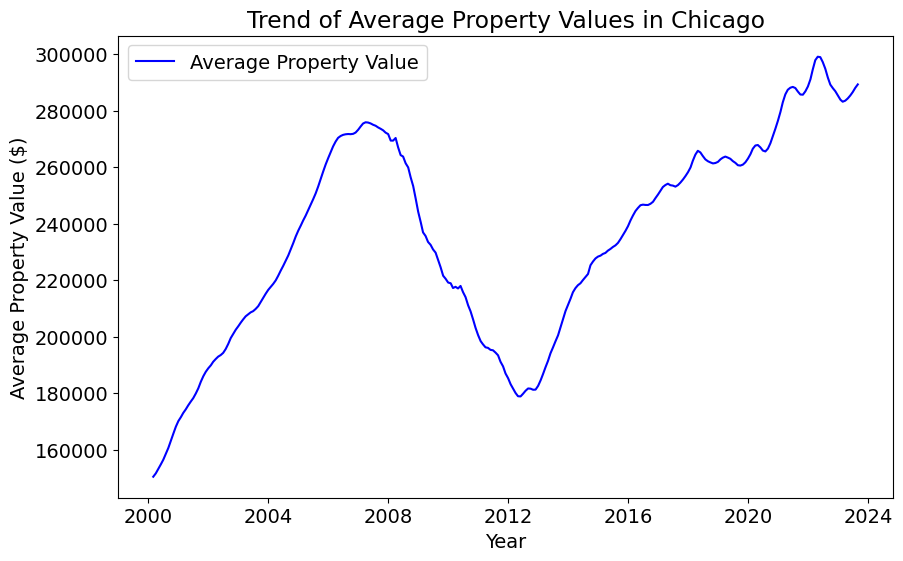

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming zillow_data is already loaded
chicago_data = data[data['City'] == 'Chicago']
chicago_avg_values = chicago_data.iloc[:, 9:].mean(axis=0)
chicago_avg_values.index = pd.to_datetime(chicago_avg_values.index)

plt.figure(figsize=(10, 6))
plt.plot(chicago_avg_values.index, chicago_avg_values, label='Average Property Value', color='blue')
plt.title('Trend of Average Property Values in Chicago')
plt.xlabel('Year')
plt.ylabel('Average Property Value ($)')
plt.legend()
plt.show()


In [82]:
# Default chart values
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.gcf().autofmt_xdate()

# Gradient color lists to be used in some charts:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

colorscale2 = ['#E0F2F1','#B2DFDB','#a0d8d3','#7cc9c2','#80CBC4','#4DB6AC','#26A69A',
               '#009688','#00897B','#00796B','#00695C','#004D40']

# List of colors to be used in some charts:
color_list = ['magenta','yellow','blue','green','red']

<Figure size 640x480 with 0 Axes>

In [83]:
# Read in states file:
states_data = gpd.read_file("C:/Users/udayv/Downloads/states/states.shp")
# Look at data we just pulled in:
states_data.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


We will map our data as we have data around different states.

In [84]:
# aligning states in alphabetical order and assinging them indices
states_data = states_data.sort_values('STATE_ABBR')
states_data.set_index('STATE_ABBR', inplace=True)
states_data.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,geometry
STATE_ABBR,,,,,
AK,Alaska,51,02,Pacific,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
AL,Alabama,43,01,East South Central,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
AR,Arkansas,47,05,West South Central,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
AZ,Arizona,37,04,Mountain,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
CA,California,25,06,Pacific,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


Here we will be doing an intersting visualization where w emap the places based on their zipcodes 

In [85]:
def gradient_mapper(metric,grad):
    
    '''
    This function outputs a list of colors that corresponds to each item in a list/series of numbers.
    This will be used to color our state map heatmap.
    
    Parameters:
    - metric - the data that we are transforming into colors
    - grad - list of colors that the metric data will be transformed to
    
    '''
    # Define the minimum and the maximum points in the dataset
    metric_min = metric.min()
    metric_max = metric.max()

    # Calculate how many colors we have in the given gradient color scheme
    colors = len(grad)-1
    
    # Transform the data to integers between zero and the length of the gradient list
    first_map = list(map(lambda x: int(round(colors*(x-metric_min) / (metric_max-metric_min),0)), list(metric)))
    
    # Map the integers to the gradient list, which is what will be used to color the state heatmaps
    return list(map(lambda x: grad[x], first_map))



def state_map(metric, grad, title, states = list(states_data.index), annot=True,
              pacific=True, dc=True, size=30, cb=True):
    
   
    # Creating a temporary dataframe that contains the state abbreviations as an index 
    # and geometry of each state with corresponding metric values:
    data_temp = states_data.loc[states,['geometry',metric]]
    
    # Drop states that have null values:
    data_temp = data_temp.dropna()
    
    # Create local varaibles for pacific and mainland states:
    pacific_states = ['AK','HI']
    mainland_states = list(filter(lambda x: x not in pacific_states,
                              list(data_temp.index)))
    
    # If no values for DC or pacific states, remove from our temporary dataframe:
    if dc == False and dc in states:
        data_temp = data_temp.drop('DC')
        mainland_states.remove('DC')
        
    if pacific == False and 'HI' in states and 'AK' in states:
        data_temp = data_temp.drop(['HI','AK'])
    
    # Use the gradient_mapper function to add the color gradient based on metric values:
    data_temp['Colors'] = gradient_mapper(metric=data_temp[metric],grad=grad)
        
    # Create a figure and axes for our chart:
    fig, ax = plt.subplots(figsize=(size,size/2))
    plt.title(title, fontsize=30)
    
    
    # First, plot the mainland states 
    for i in mainland_states:
        data_temp.loc[[i]].plot(ax=ax, color=data_temp.loc[i,'Colors'])
                
        # Indicate necessary data for if we are annotating:
        if annot == True:
            
            # Locate the location we want to plot text (the center of each state):
            centroid = data_temp.loc[[i]].centroid
            
            # Plot the text in this location:
            plt.annotate(s=f'{round(data_temp.loc[i,metric],1)}',
                 xy=(centroid.x[i], centroid.y[i]),
                 horizontalalignment='center',
                 color='white',
                 fontsize=size/2)
            
    # Remove axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Second, plot the Pacific states in their own separate subplots
    if pacific == True:
        if 'AK' in states:
            ax2 = fig.add_subplot(3,6,13)
            states_data.loc[['AK']].plot(ax=ax2,
                                       color=data_temp.loc['AK','Colors'])
            ax2.patch.set_alpha(0)
            ax2.set_xticks([])
            ax2.set_yticks([])
        
        if 'HI' in states:
            ax3 = fig.add_subplot(3,6,14)
            states_data.loc[['HI']].plot(ax=ax3,
                                       color=data_temp.loc['HI','Colors'])
            ax3.patch.set_alpha(0)
            ax3.set_xticks([])
            ax3.set_yticks([])
        
    # Third, plot the colorbar key
    if cb == True:        
        cmap = LinearSegmentedColormap.from_list(name= '', colors=grad, N=50)
        ax4 = fig.add_subplot(1,30,30)
        norm = mpl.colors.Normalize(vmin=data_temp[metric].min(),
                                    vmax=data_temp[metric].max())
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                       norm=norm, orientation='vertical')
           
    sns.despine(left=True,bottom=True)

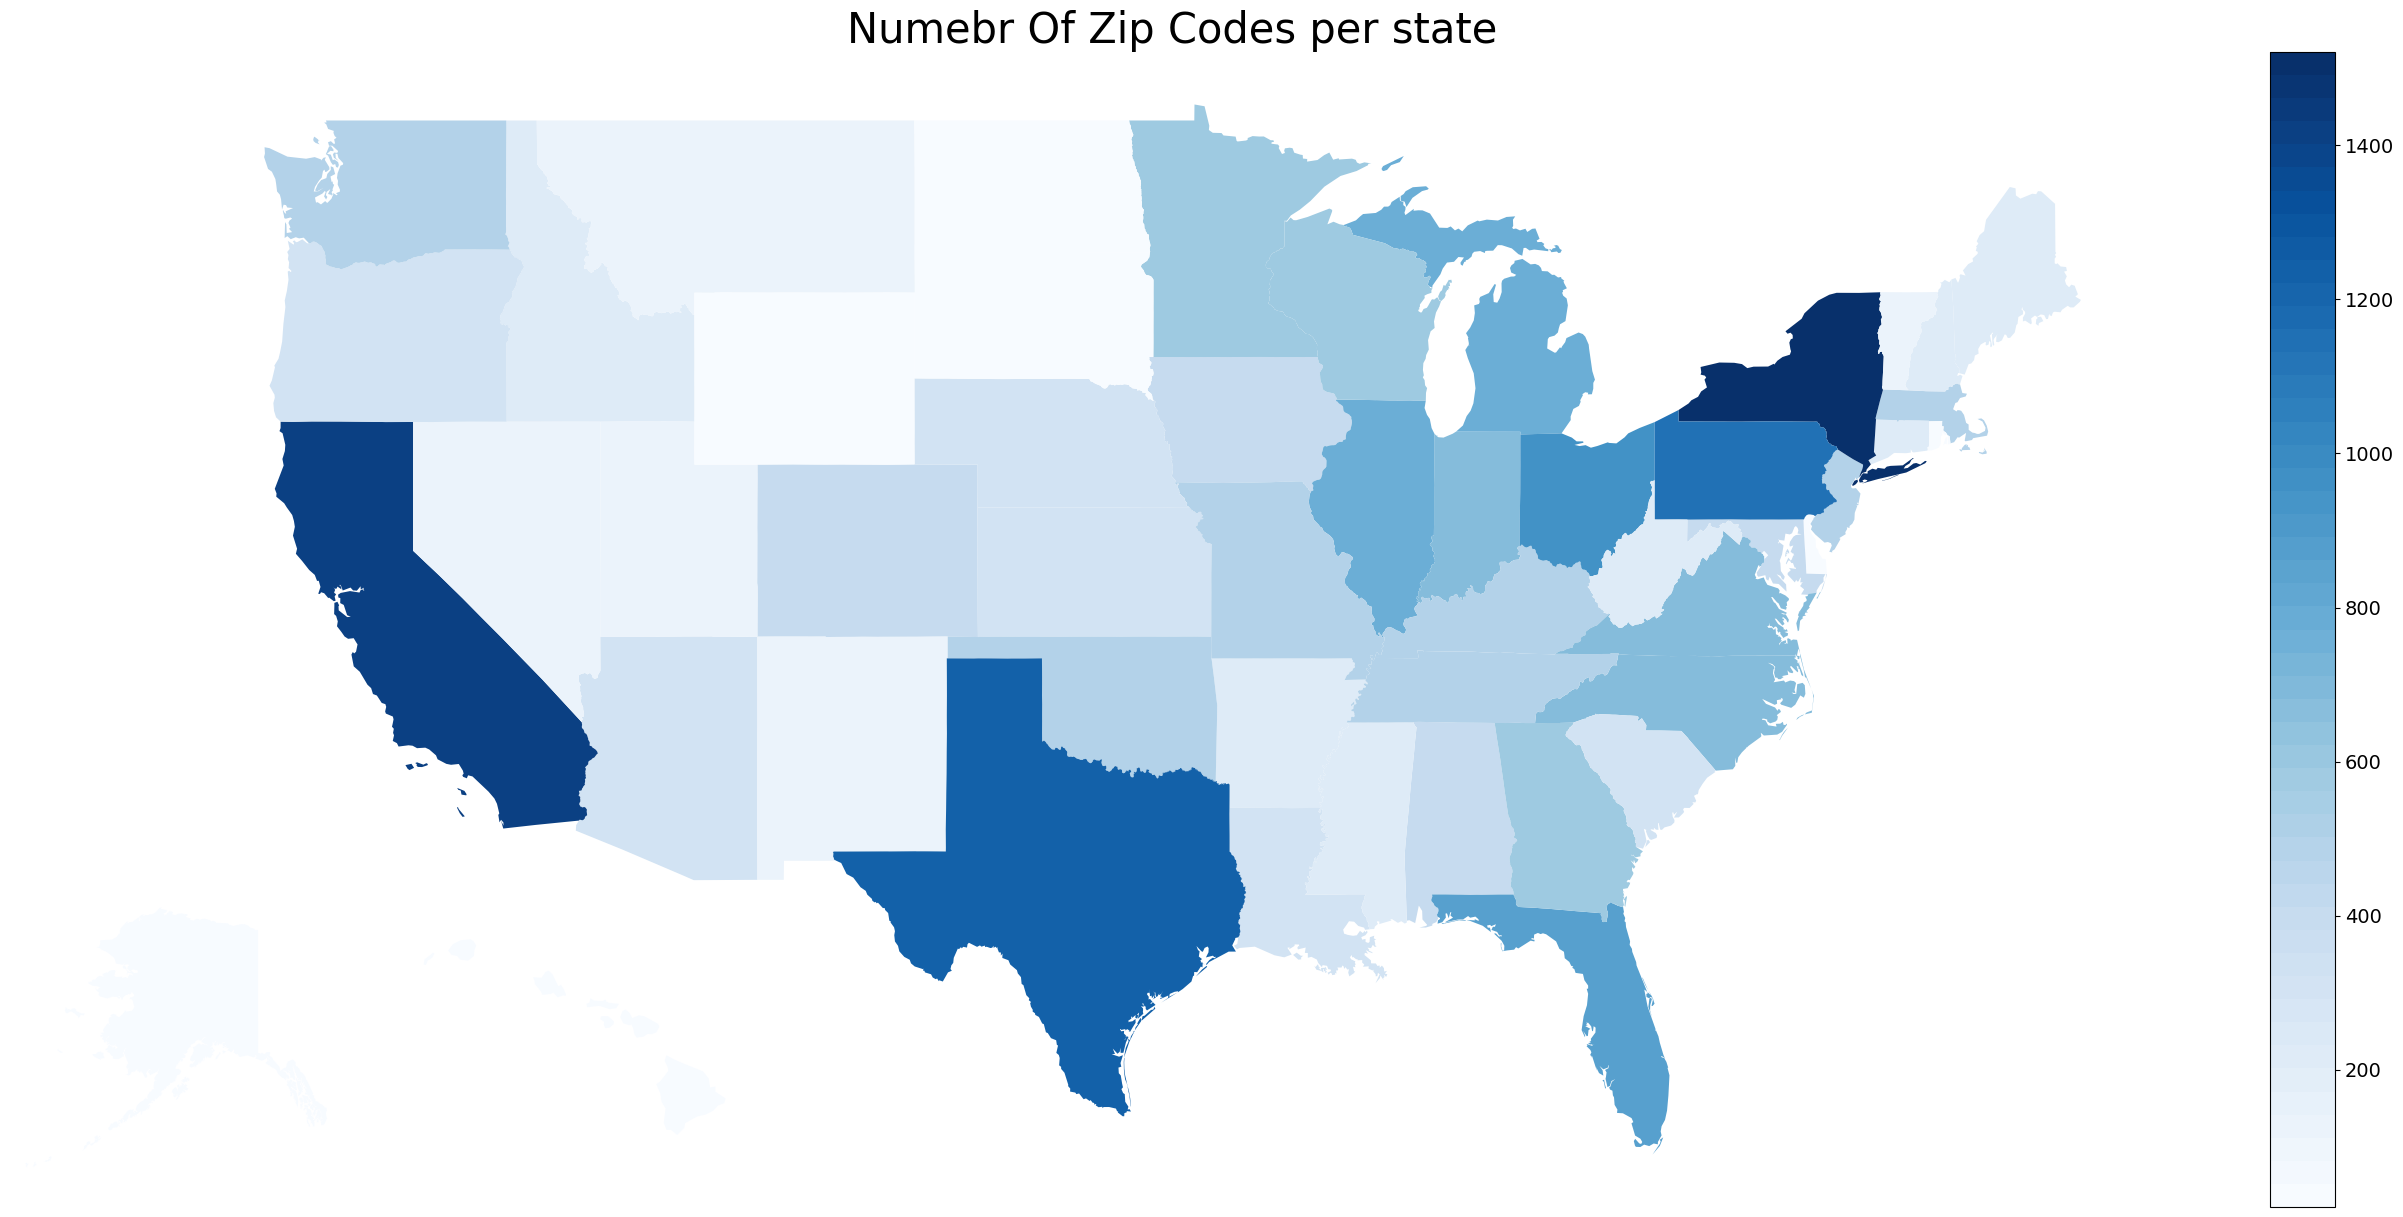

In [86]:
# Number of zipcodes in each state
states_data['RegionCount'] = data.groupby('State')['RegionName'].count()

# Mapping of data
plt.rcParams['font.family'] = 'sans-serif' 
state_map(metric='RegionCount', title='Numebr Of Zip Codes per state', grad=colorscale, annot=False, pacific=True)


In [87]:
# Pull the median and mean house price values by state from April 2018:
states_data['August_2023_median'] = data.groupby('State')[pd.to_datetime('2023-08', format='%Y-%m')].median()

states_data['August_2023_mean'] = data.groupby('State')[pd.to_datetime('2023-08', format='%Y-%m')].mean()

In [88]:
data.columns

Index([         'RegionID',          'SizeRank',        'RegionName',
                   'State',              'City',             'Metro',
              'CountyName', 2000-01-01 00:00:00, 2000-02-01 00:00:00,
       2000-03-01 00:00:00,
       ...
       2022-12-01 00:00:00, 2023-01-01 00:00:00, 2023-02-01 00:00:00,
       2023-03-01 00:00:00, 2023-04-01 00:00:00, 2023-05-01 00:00:00,
       2023-06-01 00:00:00, 2023-07-01 00:00:00, 2023-08-01 00:00:00,
       2023-09-01 00:00:00],
      dtype='object', length=292)

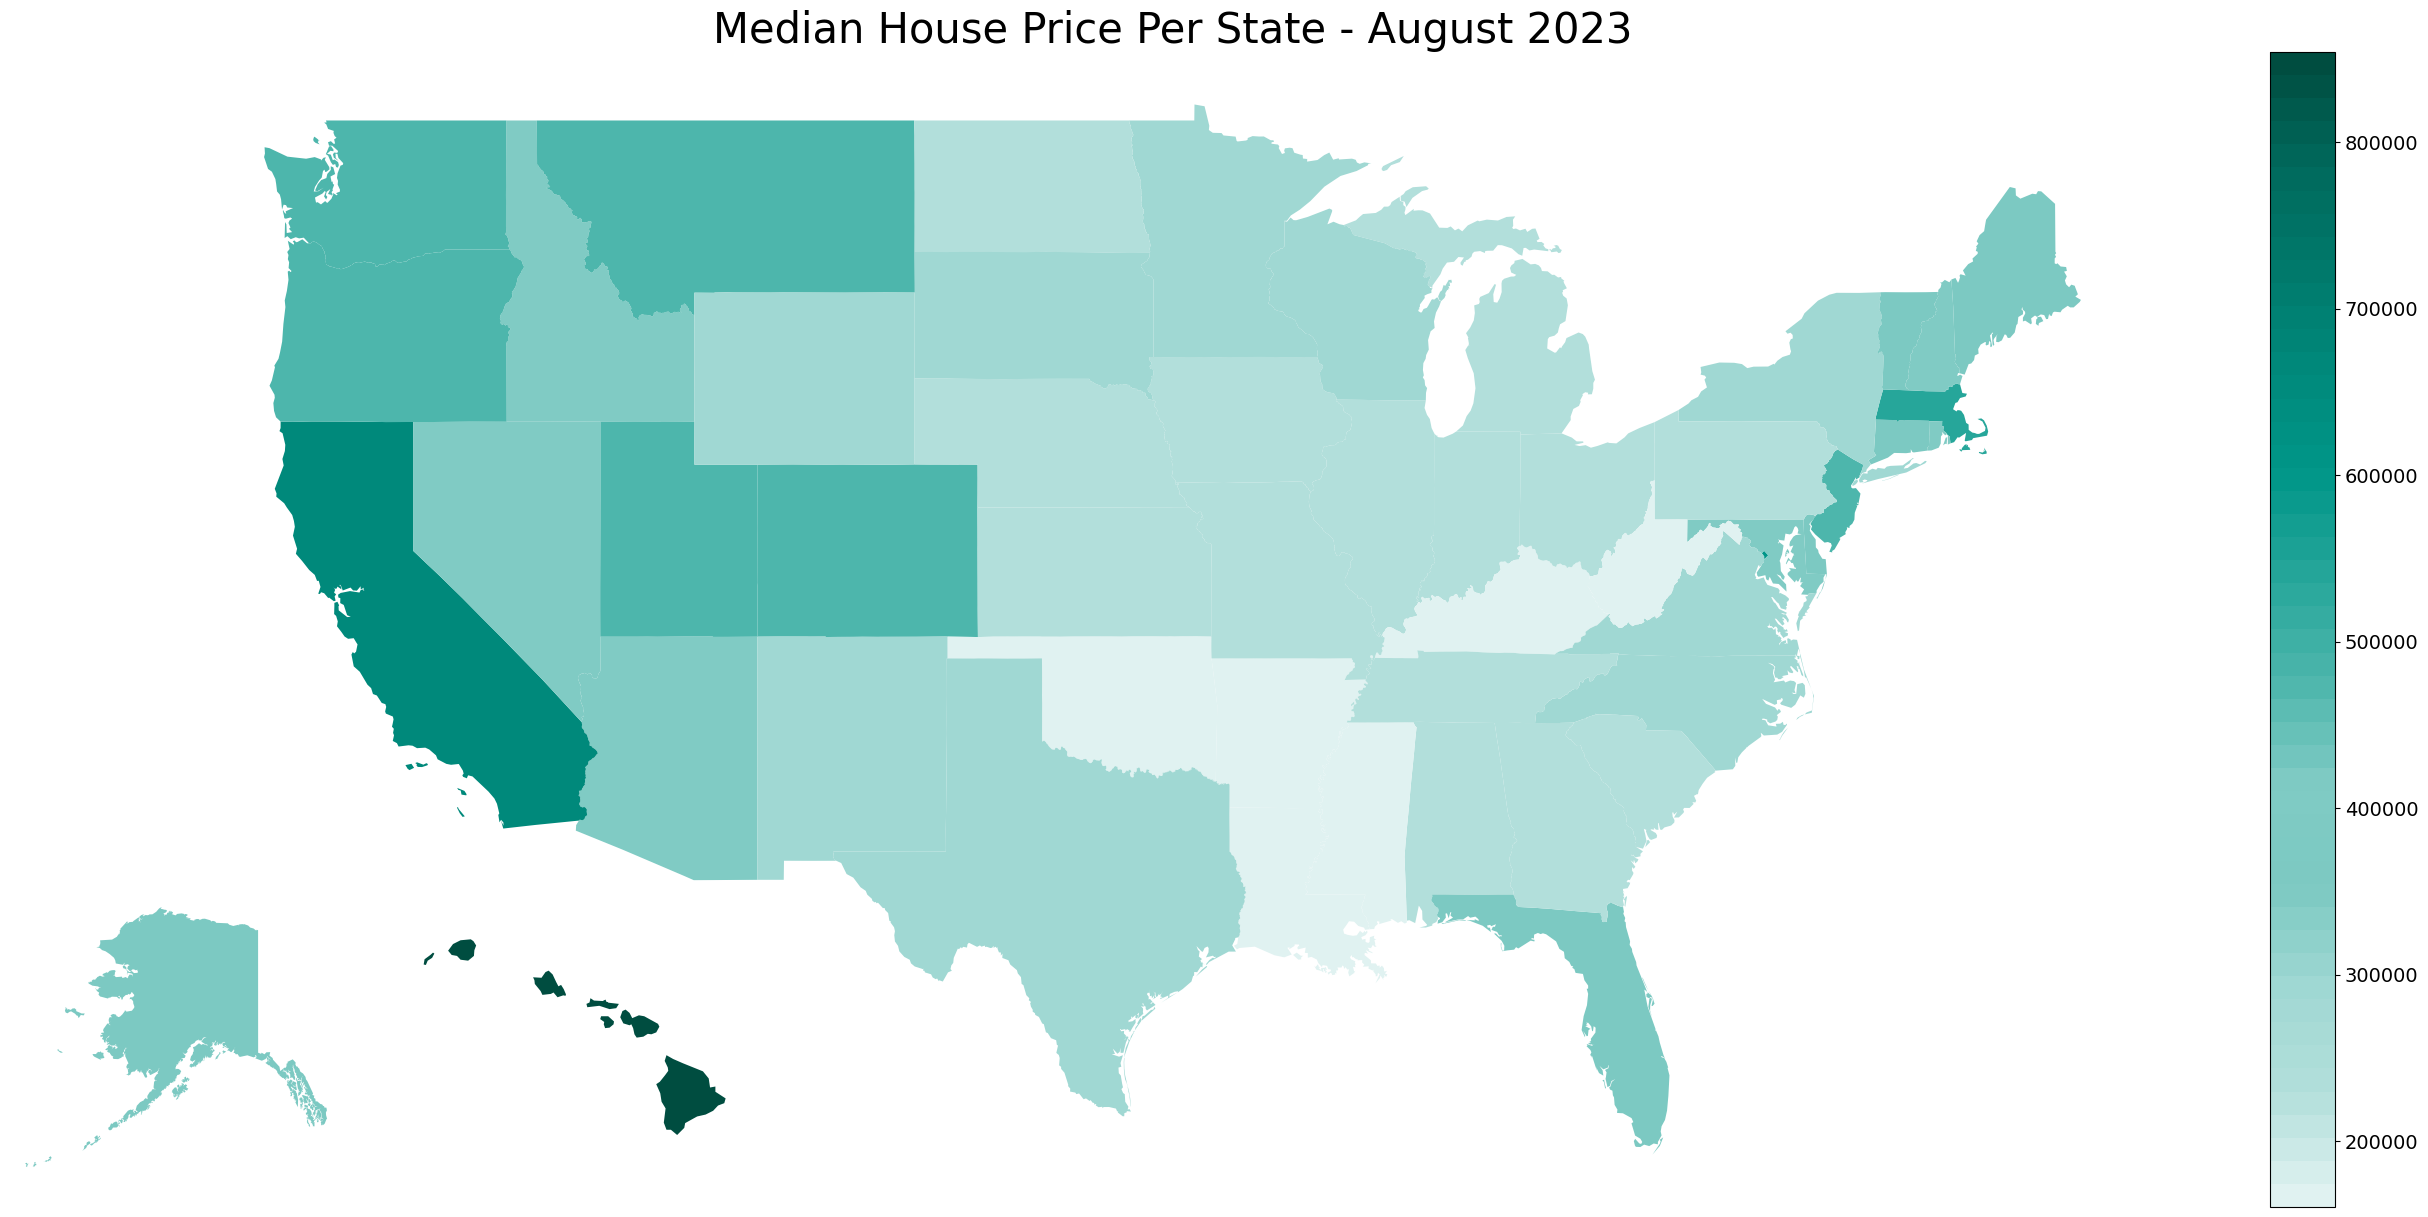

In [89]:
# Look at the median on a state by state basis:
plt.rcParams['font.family'] = 'sans-serif' 
state_map(metric = 'August_2023_median', title = 'Median House Price Per State - August 2023', 
          grad = colorscale2, annot=False, pacific=True)

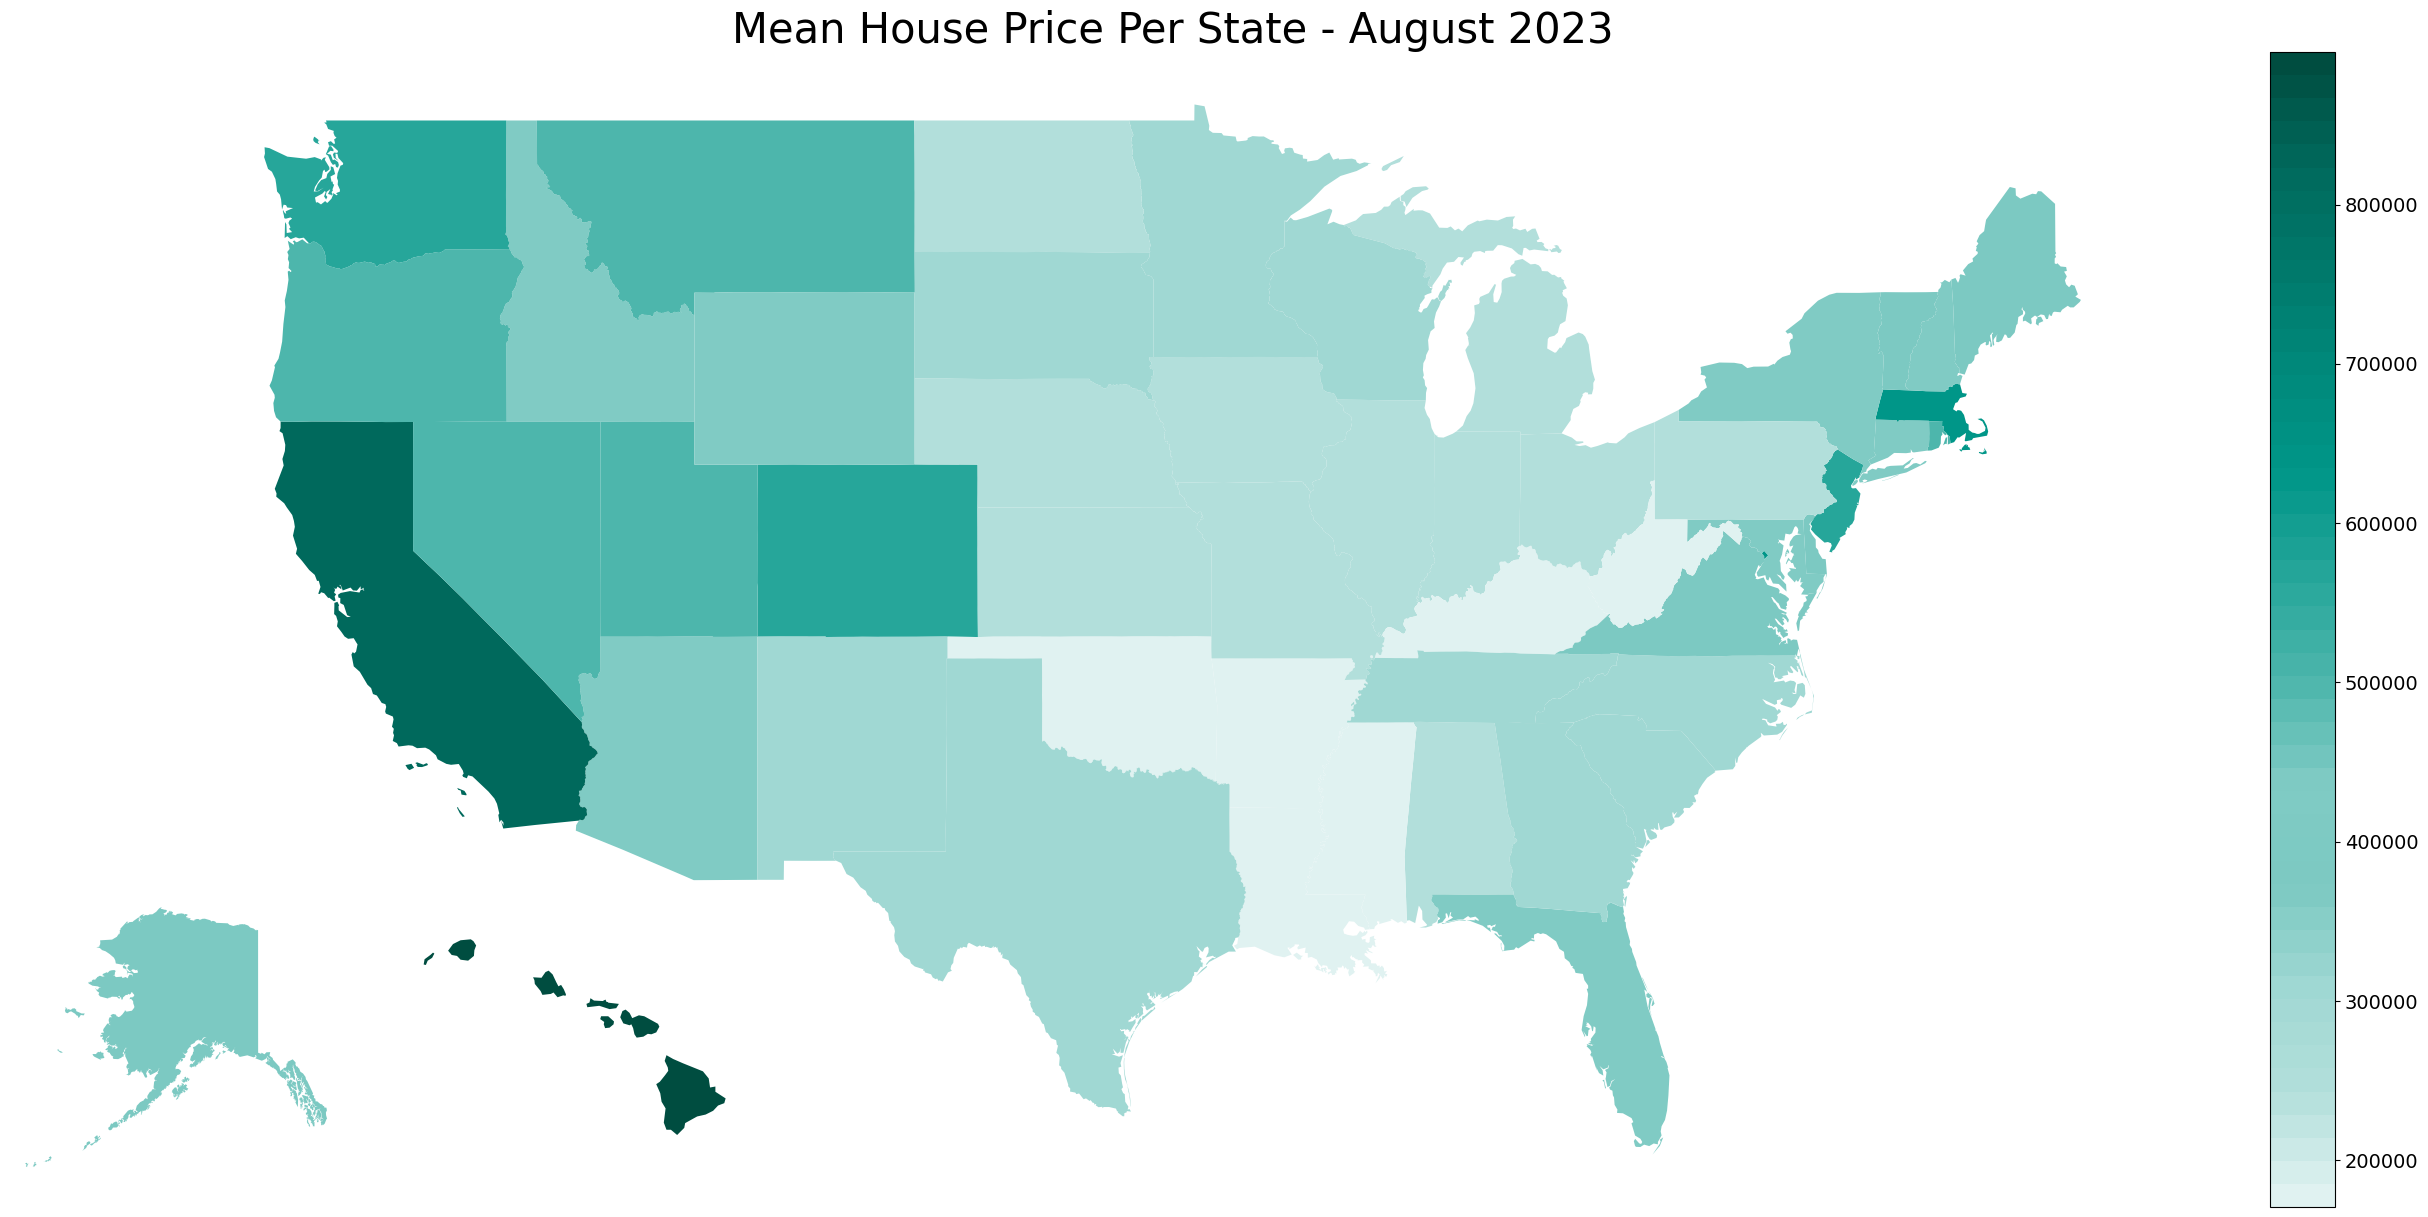

In [90]:
# Look at the mean on a state by state basis
plt.rcParams['font.family'] = 'sans-serif' 
state_map(metric = 'August_2023_mean', title = 'Mean House Price Per State - August 2023', 
          grad = colorscale2, annot=False, pacific=True)

It looks like California, Hawaii and New York have the highest medians and means. Also, there appear to be some differences between the mean and median values of some states, which indicates there are most likely some outlier regions. Let's do some digging to see which states have outlier zipcodes that are driving the mean home value for the state up or down.

Maximum median : 854278.0
Maximum mean : 895718.0


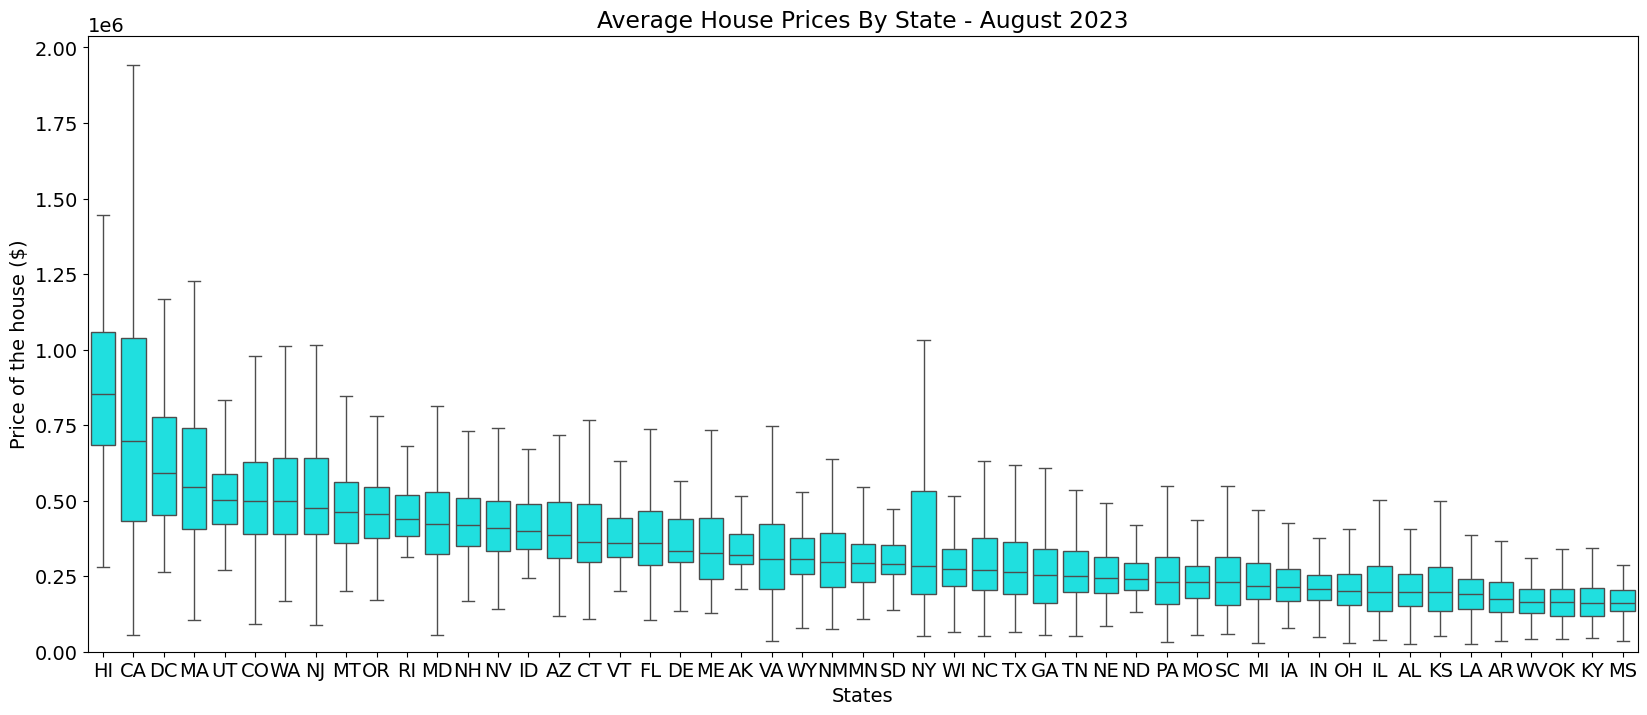

In [91]:
# See if there are any outlier zipcodes that are driving the mean home prices up or down
# Set plot figure:
plt.figure(figsize=(20,8))

# Collect most recent data from April 2018:
y = pd.to_datetime('2023-08', format='%Y-%m')

# Put states in descending order based on their medians:
state_order = states_data['August_2023_median'].sort_values(ascending=False).index

# Create a boxplot for each state:
sns.boxplot(x='State',y=y,data=data,order=state_order, showfliers=False, color = 'Aqua')

# Set labels and axis limits:
plt.ylim(0,);
plt.title('Average House Prices By State - August 2023');
plt.xlabel('States')
plt.ylabel('Price of the house ($)')

# Print maximum mean value
print('Maximum median',':',states_data['August_2023_median'].max().round(0))
print('Maximum mean',':',states_data['August_2023_mean'].max().round(0))

We see further support for outliers being present in some states both when looking at the maximum mean value vs. the maximum median value and when looking at our boxplot chart. It looks like California on a whole has higher house prices than most other states, followed by Hawaii, DC and Massachusetts, while Mississippi, Kentucky, and Oklahama have the lowest average home prices. Additionally, California, Massachusetts, Maryland and New York appear to have some outlier regions that have much higher home prices than most other regions in those states. This indicates that these states are home to some of the most expensive zipcodes to live in.


summary of the statistcics for better understanding fo the data.

In [92]:
def generate_summary_statistics(data):
    # (dates are from the 8th column onwards)
    date_columns = data.columns[7:]

    # Create an empty dataframe:
    sum_stats = pd.DataFrame(index=date_columns)

    # And summary statistics values we are interested in looking at:
    sum_stats['Mean'] = data[date_columns].mean()
    sum_stats['Min'] = data[date_columns].min()
    sum_stats['25%'] = data[date_columns].quantile(0.25)
    sum_stats['50%'] = data[date_columns].quantile(0.5)
    sum_stats['75%'] = data[date_columns].quantile(0.75)
    sum_stats['Max'] = data[date_columns].max()

    # Reset the index to get a column named 'index'
    sum_stats.reset_index(inplace=True)
    sum_stats.reset_index(drop=True, inplace=True)


    return sum_stats

# Example usage:
sum_stats = generate_summary_statistics(data)

# Display the result
sum_stats.tail()



,index,Mean,Min,25%,50%,75%,Max
280,2023-05-01,355342.576130,25837.033142,188847.092459,277583.046800,418398.089769,7.503973e+06
281,2023-06-01,357801.771768,25795.231519,190471.880515,279588.991420,420955.148527,7.502798e+06
282,2023-07-01,360096.681601,26132.322015,191700.575668,281091.861889,423495.401012,7.527466e+06
283,2023-08-01,362206.564219,26409.512736,192423.571001,282360.176153,425586.797535,7.556126e+06
284,2023-09-01,363965.794933,26748.321356,193113.843027,283590.269661,427176.486919,7.577484e+06


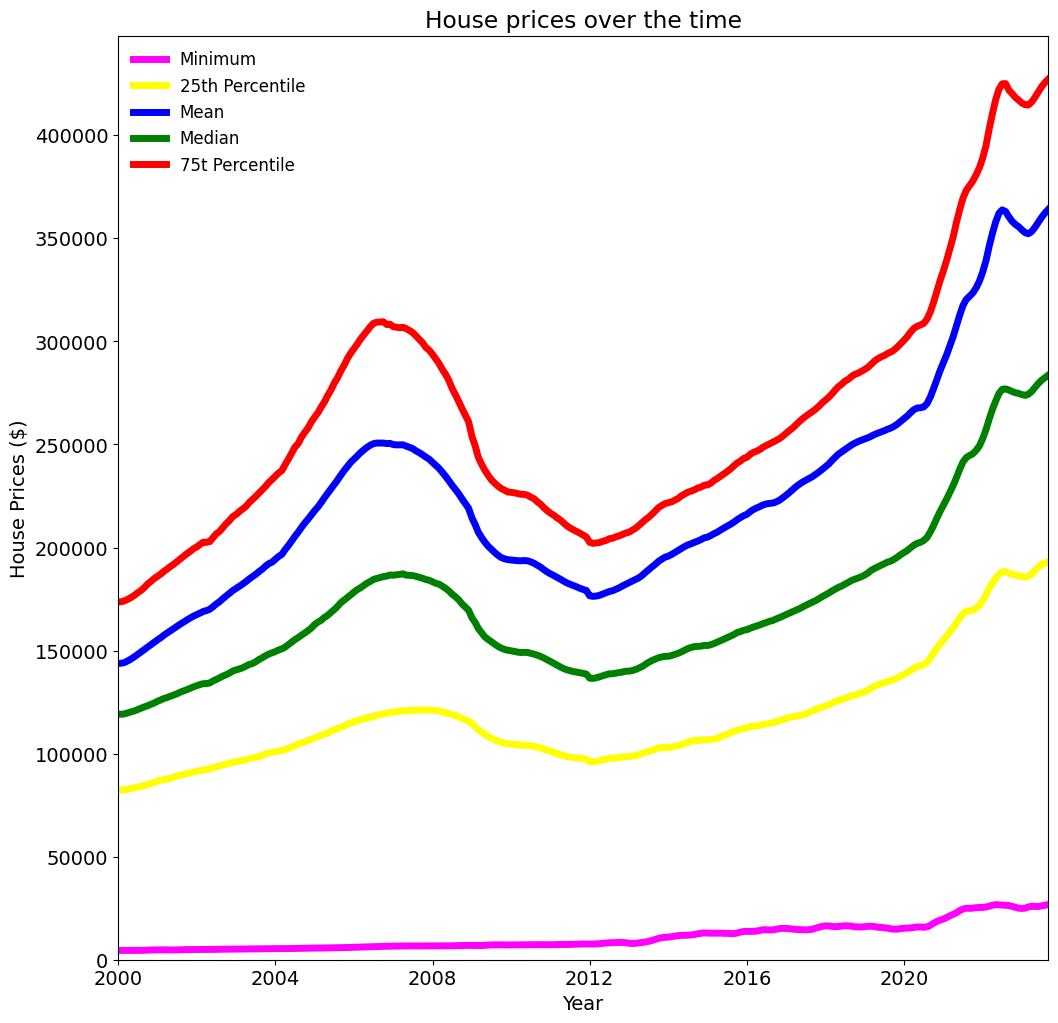

In [93]:
# Initiate figure and select dates for x-axis:
plt.figure(figsize=(12,12))
sum_stats['index'] = pd.to_datetime(sum_stats['index'])

x = sum_stats['index'].dt.to_pydatetime()

#
plt.plot(x, sum_stats['Min'], lw = 5,
         label = 'Minimum House Price', color=color_list[0])
plt.plot(x, sum_stats['25%'], lw = 5,
         label = '25th Percentile House Price', color=color_list[1])
plt.plot(x, sum_stats['Mean'], lw = 5,
         label = 'Mean House Price', color=color_list[2])
plt.plot(x, sum_stats['50%'], lw = 5,
         label = 'Median House Price', color =color_list[3])
plt.plot(x, sum_stats['75%'], lw = 5,
         label = '75th Percentile House Price', color=color_list[4])

# Add chart labels and limits
plt.xlim(sum_stats['index'][0],sum_stats['index'][len(sum_stats)-1]);
plt.ylim(0,);

plt.title('House prices over the time')
plt.ylabel('House Prices ($)')
plt.xlabel('Year')

custom_lines = [Line2D([0], [0], c=color_list[0], lw=5, markerfacecolor='green', markersize=10),
                Line2D([0], [0], c=color_list[1], lw=5, markerfacecolor='green', markersize=10),
                Line2D([0], [0], c=color_list[2], lw=5, markerfacecolor='green', markersize=10),
                Line2D([0], [0], c=color_list[3], lw=5, markerfacecolor='green', markersize=10),
                Line2D([0], [0], c=color_list[4], lw=5, markerfacecolor='green', markersize=10)]
# Identify labels for legend 
plt.legend(custom_lines,
           ['Minimum','25th Percentile','Mean','Median',
            '75t Percentile'],
           loc = 2,
           fontsize = 12,
           frameon=False);

We see quite a large gap between the minimum home prices and all other variables[quartiles]. The mean values seem to be closer to the 75th percentile rather than to the 50th percentile. Andthere is steady increase in price of the house over the years 2000 to 2006 and continuous increase in price over the range 2012 till today.

The next thing ia we want to look at is which regions had the best avergae annual growth rate. It is important to look at how much prices have typically grown each year rather than just looking at the final value of a home so that we can incorporate the true potential of the homes based on both their starting value and ending value. We will calculate the growth rate between 199 and 2007 (when the housing market crashed), 2007 and 2012 (time period when housing market was down), 2012 and 2018 (when housing market recovered to most recent data) and 1996 to 2018 (full range of our data).

In [94]:
# Create a new dataframe to hold our new information:
data_stats = data[list(data.columns[:7])]

# Select the prices from the earliest time:
Aug00 = pd.to_datetime('2000-08', format='%Y-%m')
data_stats['Aug00'] = data[Aug00]

# Select the prices from when the crisis hit (2007):
Aug07 = pd.to_datetime('2007-08', format='%Y-%m')
data_stats['Aug07'] = data[Aug07]

# Select the prices from when the housing market recovered from the crisis (2012):
Aug12 = pd.to_datetime('2012-08', format='%Y-%m')
data_stats['Aug12'] = data[Aug12]

# Select the prices from the most recent time: 
Aug18 = pd.to_datetime('2018-08', format='%Y-%m')
data_stats['Aug18'] = data[Aug18]

# Calculate the average annual growth rate between each desired time frame:
data_stats['\'00-\'07 Growth_Rate %'] = (((data_stats['Aug07'] / data_stats['Aug00'])**(1/11))-1)*100
data_stats['\'07-\'12 Growth_Rate %'] = (((data_stats['Aug12'] / data_stats['Aug07'])**(1/5))-1)*100
data_stats['\'12-\'18 Growth_Rate %'] = (((data_stats['Aug18'] / data_stats['Aug12'])**(1/6))-1)*100
data_stats['\'00-\'18 Growth_Rate %'] = (((data_stats['Aug18'] / data_stats['Aug00'])**(1/22))-1)*100
data_stats.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,Aug00,Aug07,Aug12,Aug18,'00-'07 Growth_Rate %,'07-'12 Growth_Rate %,'12-'18 Growth_Rate %,'00-'18 Growth_Rate %
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,211810.946027,244791.498199,254066.732518,324620.990955,1.324262,0.746576,4.168913,1.959701
1,61148,2,8701,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,144641.461140,313397.594931,221412.856211,338960.716511,7.282166,-6.712934,7.355531,3.946929
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103860.083028,127631.804825,109563.978516,181828.772009,1.891345,-3.006691,8.809246,2.578225
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,159909.177664,351657.877355,285483.849439,492772.007073,7.426978,-4.083739,9.524366,5.248748
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102030.647911,126025.746849,112146.843630,175826.019413,1.938671,-2.306526,7.782772,2.504586


Let's see which 10 regions have the highest average annual growth rate in each of our timeframes to see if there are any regions that have had consistent strong growth.

In [95]:
def growth_rate(column):
    '''
    This function will print the top 10 zip codes with the highest growth rates.
    Parameter:
    column - column within the data_stats dataframe that we want to look at.
    '''

    growth = data_stats.sort_values(by = column,
                                      ascending=False).loc[:,['RegionName','CountyName','State',column]]
    print(column,'\n',growth.head(10),'\n')

# Utilize the growth_rate function for each of our 4 timeframes:   
growth_rate('\'00-\'07 Growth_Rate %')
growth_rate('\'07-\'12 Growth_Rate %')
growth_rate('\'12-\'18 Growth_Rate %')
growth_rate('\'00-\'18 Growth_Rate %')

'00-'07 Growth_Rate % 
        RegionName             CountyName State  '00-'07 Growth_Rate %
11038       90014     Los Angeles County    CA              13.307199
5419        19122    Philadelphia County    PA              12.795888
1855        11222           Kings County    NY              12.709270
4253        90017     Los Angeles County    CA              12.432963
14519       92285  San Bernardino County    CA              12.181347
17591       92282       Riverside County    CA              11.933172
21140       13608       Jefferson County    NY              11.844726
256         10027        New York County    NY              11.773807
4500        19125    Philadelphia County    PA              11.717688
402         11216           Kings County    NY              11.676323 

'07-'12 Growth_Rate % 
        RegionName        CountyName State  '07-'12 Growth_Rate %
7423        35773    Madison County    AL              15.351807
15045       74058     Pawnee County    OK         

looks like we definitely have variation between timeframes, meaning the growth rate for each region has been changing over time.  In recent years, California seems to have a couple of the top growth rate regions.  Since the data seems to change quite a bit over time, I would like to focus on the more recent data for my analysis since I feel that would be most relevant. Therefore, let's take a deeper look at the 2007-2012 and 2012-2018 timeframes to see which states had the most growth rate regions within each timeframe.

Rows with non-numeric values:
       RegionID  SizeRank  RegionName State             City  \
76        92271        78       78130    TX    New Braunfels   
107       61792       112       10452    NY         New York   
191       92125       197       77845    TX  College Station   
227       92225       233       78046    TX           Laredo   
257       60499       263        6902    CT         Stamford   
...         ...       ...         ...   ...              ...   
26354    100030     39992       98934    WA         Kittitas   
26358     67368     39992       22722    VA          Haywood   
26360     99927     39992       98628    WA        Klickitat   
26363     78282     39992       46799    IN       Zanesville   
26364     67377     39992       22731    VA            Aroda   

                                              Metro        CountyName  Aug00  \
76                    San Antonio-New Braunfels, TX      Comal County    NaN   
107           New York-Newark-Jersey City

<Axes: xlabel='State', ylabel="'07-'12 Growth_Rate %">

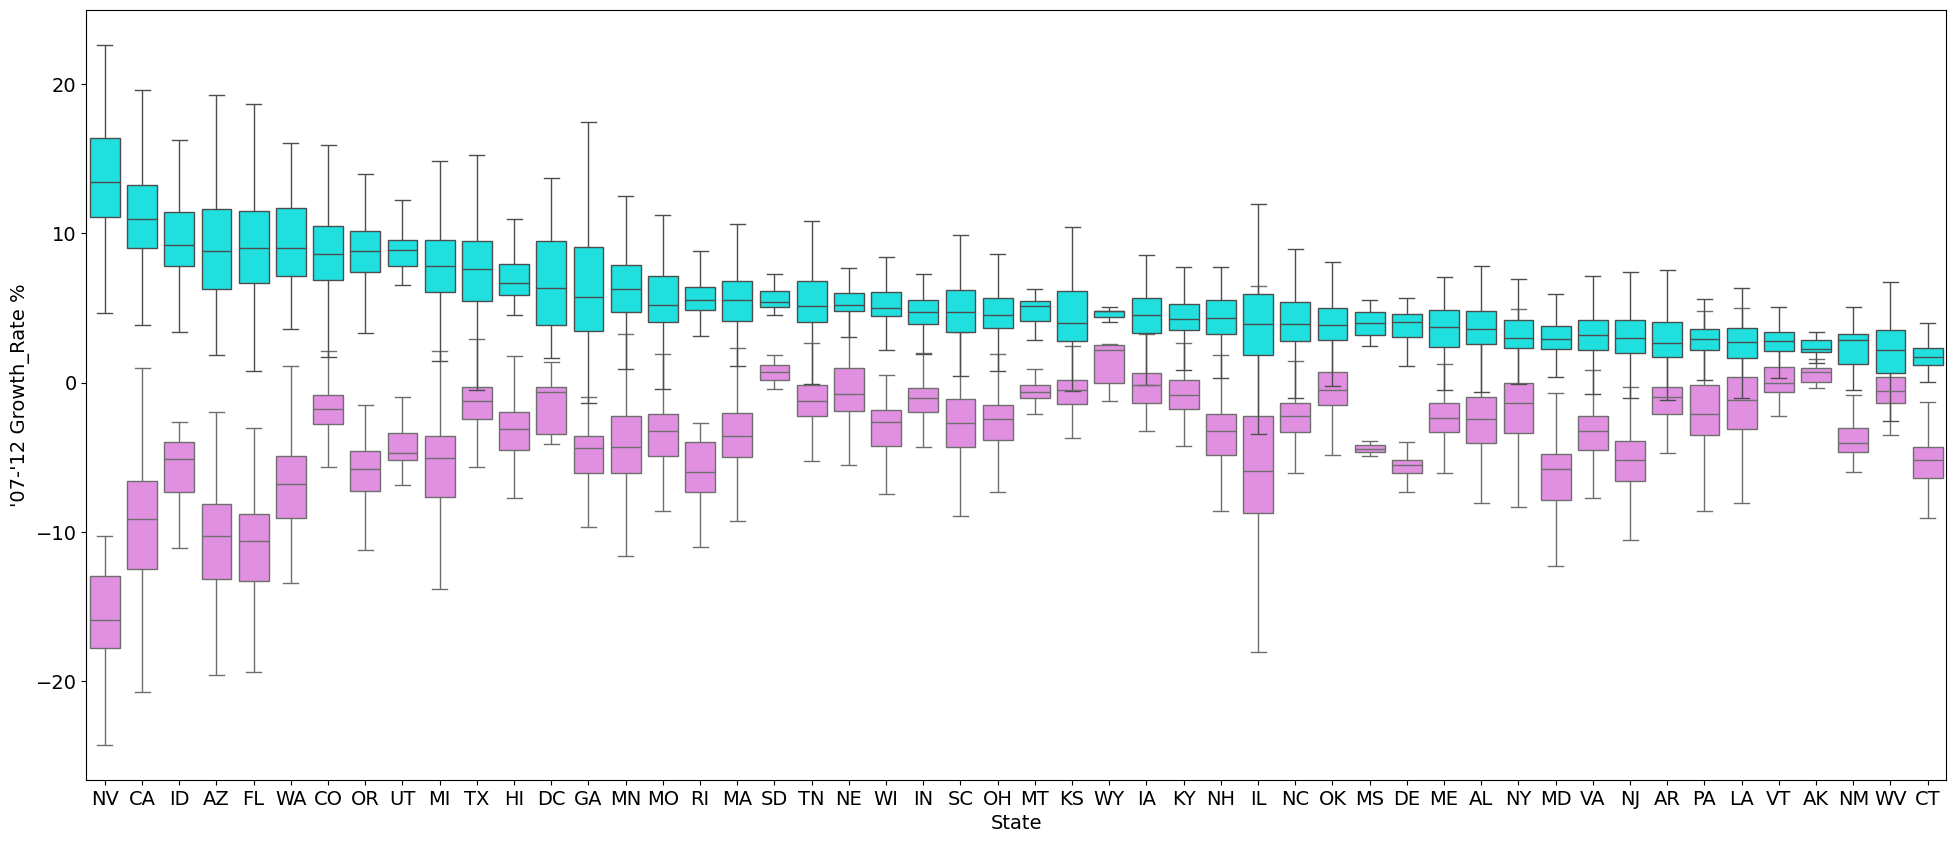

In [96]:
# Convert relevant columns to numeric types
numeric_columns = ['\'07-\'12 Growth_Rate %', '\'12-\'18 Growth_Rate %']

# Try to convert to numeric, coerce non-numeric values to NaN
data_stats[numeric_columns] = data_stats[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Identify rows with non-numeric values
non_numeric_rows = data_stats[data_stats[numeric_columns].isnull().any(axis=1)]

# Display the rows with non-numeric values
print("Rows with non-numeric values:")
print(non_numeric_rows)

# Drop rows with NaN values after conversion
data_stats = data_stats.dropna(subset=numeric_columns)

# Convert numeric columns to numeric types (in case they were not converted properly)
data_stats[numeric_columns] = data_stats[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group the data by state and calculate the mean
group_data_stats = data_stats.groupby('State')[numeric_columns].mean()

# Rest of the plotting code remains the same...

# Setup plot and axes:
fig, ax1 = plt.subplots(figsize=(24, 10))

# Order the data in descending order based on the values from 2012-2018:
state_order = group_data_stats['\'12-\'18 Growth_Rate %'].sort_values(ascending=False).index

# Create boxplot
sns.boxplot(x='State', y='\'07-\'12 Growth_Rate %',
            data=data_stats, order=state_order,
            showfliers=False, color='violet', ax=ax1)

sns.boxplot(x='State', y='\'12-\'18 Growth_Rate %',
            data=data_stats, order=state_order,
            showfliers=False, color='aqua', ax=ax1)

# Continue with the rest of the plotting code...


It looks like many of the states with the highest growth rates in recent years actually had some of the worst growth rates during the housing crisis.  

For my analysis, I want to isolate the regions with the strongest potential so that I have a more reasonably sized dataset to work with. To qualify as a region with strong potential, the region must have above average annual growth rate since the housing market recovered from the crisis (2012), and also have above average annual growth rate during the crisis (2007-2012) to make sure the regions can be strong at the face of adversity. I will isolate these regions band pull them into a new dataframe.

In [97]:
# Calculate the average within each timeframe:
avg_07_12 = data_stats['\'07-\'12 Growth_Rate %'].mean()
avg_12_18 = data_stats['\'12-\'18 Growth_Rate %'].mean()

# Select only the regions with the strongest potential based on having higher than average annual growth rates both 
# in recent years (2012-2018) and during the housing recesion (2007-2012):
data_stats_strong_growth = data_stats.loc[(data_stats['\'07-\'12 Growth_Rate %']>avg_07_12) &
                               (data_stats['\'12-\'18 Growth_Rate %']>avg_12_18)]
strong_growth_regions = list(data_stats_strong_growth['RegionName'])

# Add growth_regions as a column to the original dataframe so that it is easy to determine which regions are and 
# are not growth regions:
data['GrowthRegion'] = data['RegionName'].map(
    lambda x: 1 if x in strong_growth_regions else 0)

# Re-order columns so that GrowthRegion appears before the pricing data:
cols = list(data.columns)
data = data[cols[:7] + [cols[-1]] + cols[7:-1]]

# Create a new dataframe that only includes regions that are considered 'Growth Regions':
data_growth = data.loc[data['GrowthRegion']==1]
data_growth.head()

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,GrowthRegion,2000-01-01 00:00:00,2000-02-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
2,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1,103318.630160,103332.906580,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,62080,4,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1,149035.558030,150516.820047,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1,101939.033374,101896.281180,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440
6,62093,7,11385,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1,259535.003730,260652.112996,...,792598.550141,791168.189051,789435.769889,788261.159092,789847.294963,791681.947219,792485.705980,791878.833855,790752.972538,788784.963654
7,92593,8,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,1,154745.140236,155046.068035,...,437707.124468,429922.620221,423315.285033,418022.715750,414228.424361,411789.097841,410718.728117,409767.840754,408502.739189,406655.196648


#### Contributions
Sujay Dahagam <br>
Anuraag Reddy Kommareddy

Now that we have selected only data representing regions that have shown strong growth rates, let's see which states have the most growth regions. 

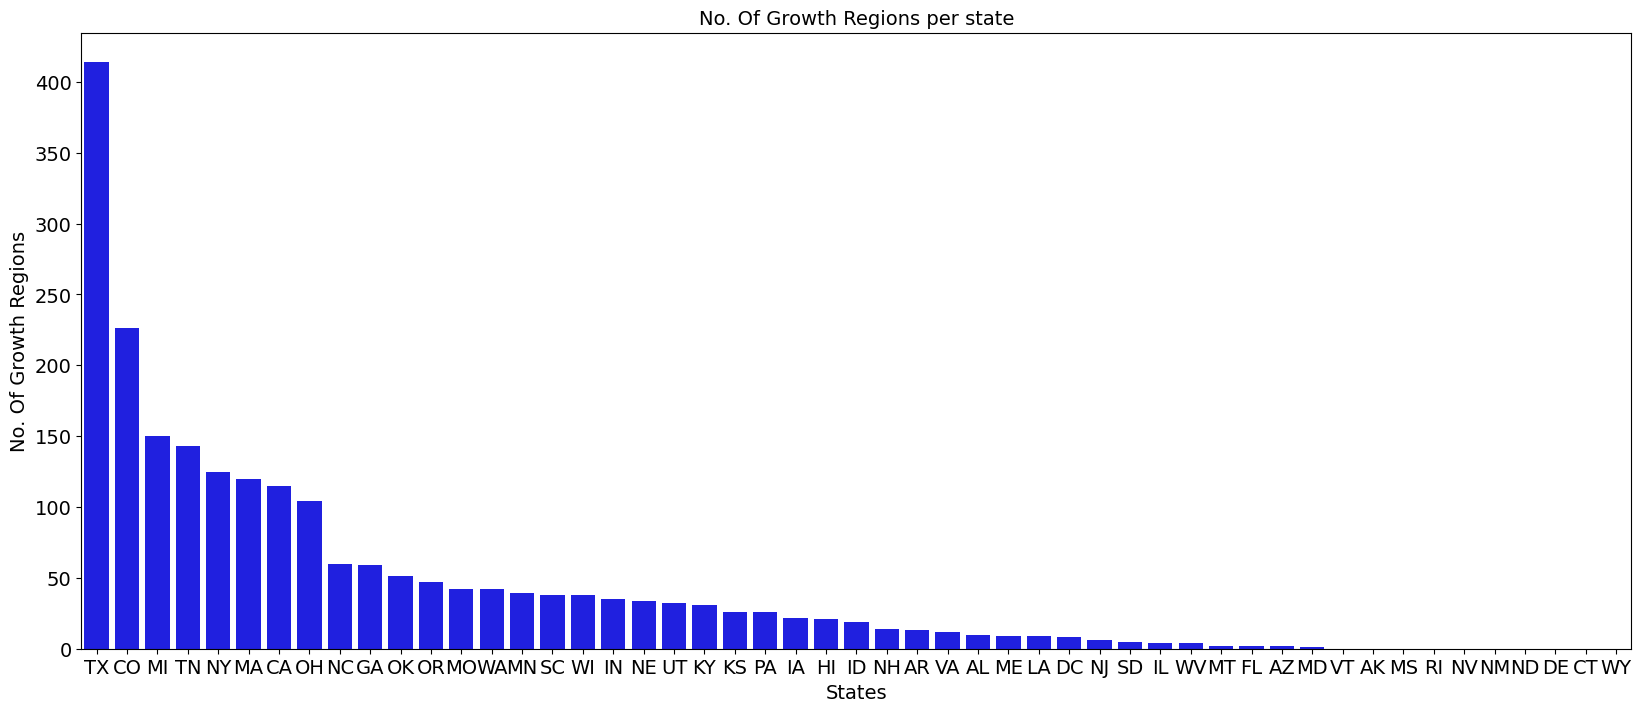

In [98]:
# Assuming states_data, data_growth, and GrowthRegion are defined appropriately

# Create a column with the number of growth regions in each state:
states_data['#GrowthRegions'] = data_growth.groupby('State').sum()['GrowthRegion']

# Fill in states with no growth regions with a zero:
states_data['#GrowthRegions'].fillna(0, inplace=True)

# Order the data in descending order by the # of growth regions per state:
states_ordered = states_data.sort_values('#GrowthRegions', ascending=False)

# Plot what percent of each state's zip codes are growth regions:

# Use Seaborn barplot with data=states_ordered, x='State', y='#GrowthRegions'
plt.figure(figsize=(20, 8))
sns.barplot(data=states_ordered, x=states_ordered.index, y='#GrowthRegions', color='b')

# Adding labels and title
plt.xlabel("States")
plt.ylabel("No. Of Growth Regions")
plt.title('No. Of Growth Regions per state', fontdict={'fontsize': 14})

# Display the plot
plt.show()


On a total level, Texas has the most growth regions, followed by Colorado and Miami. Let's now see which states have the most growth regions compared to the total number of regions in each state.

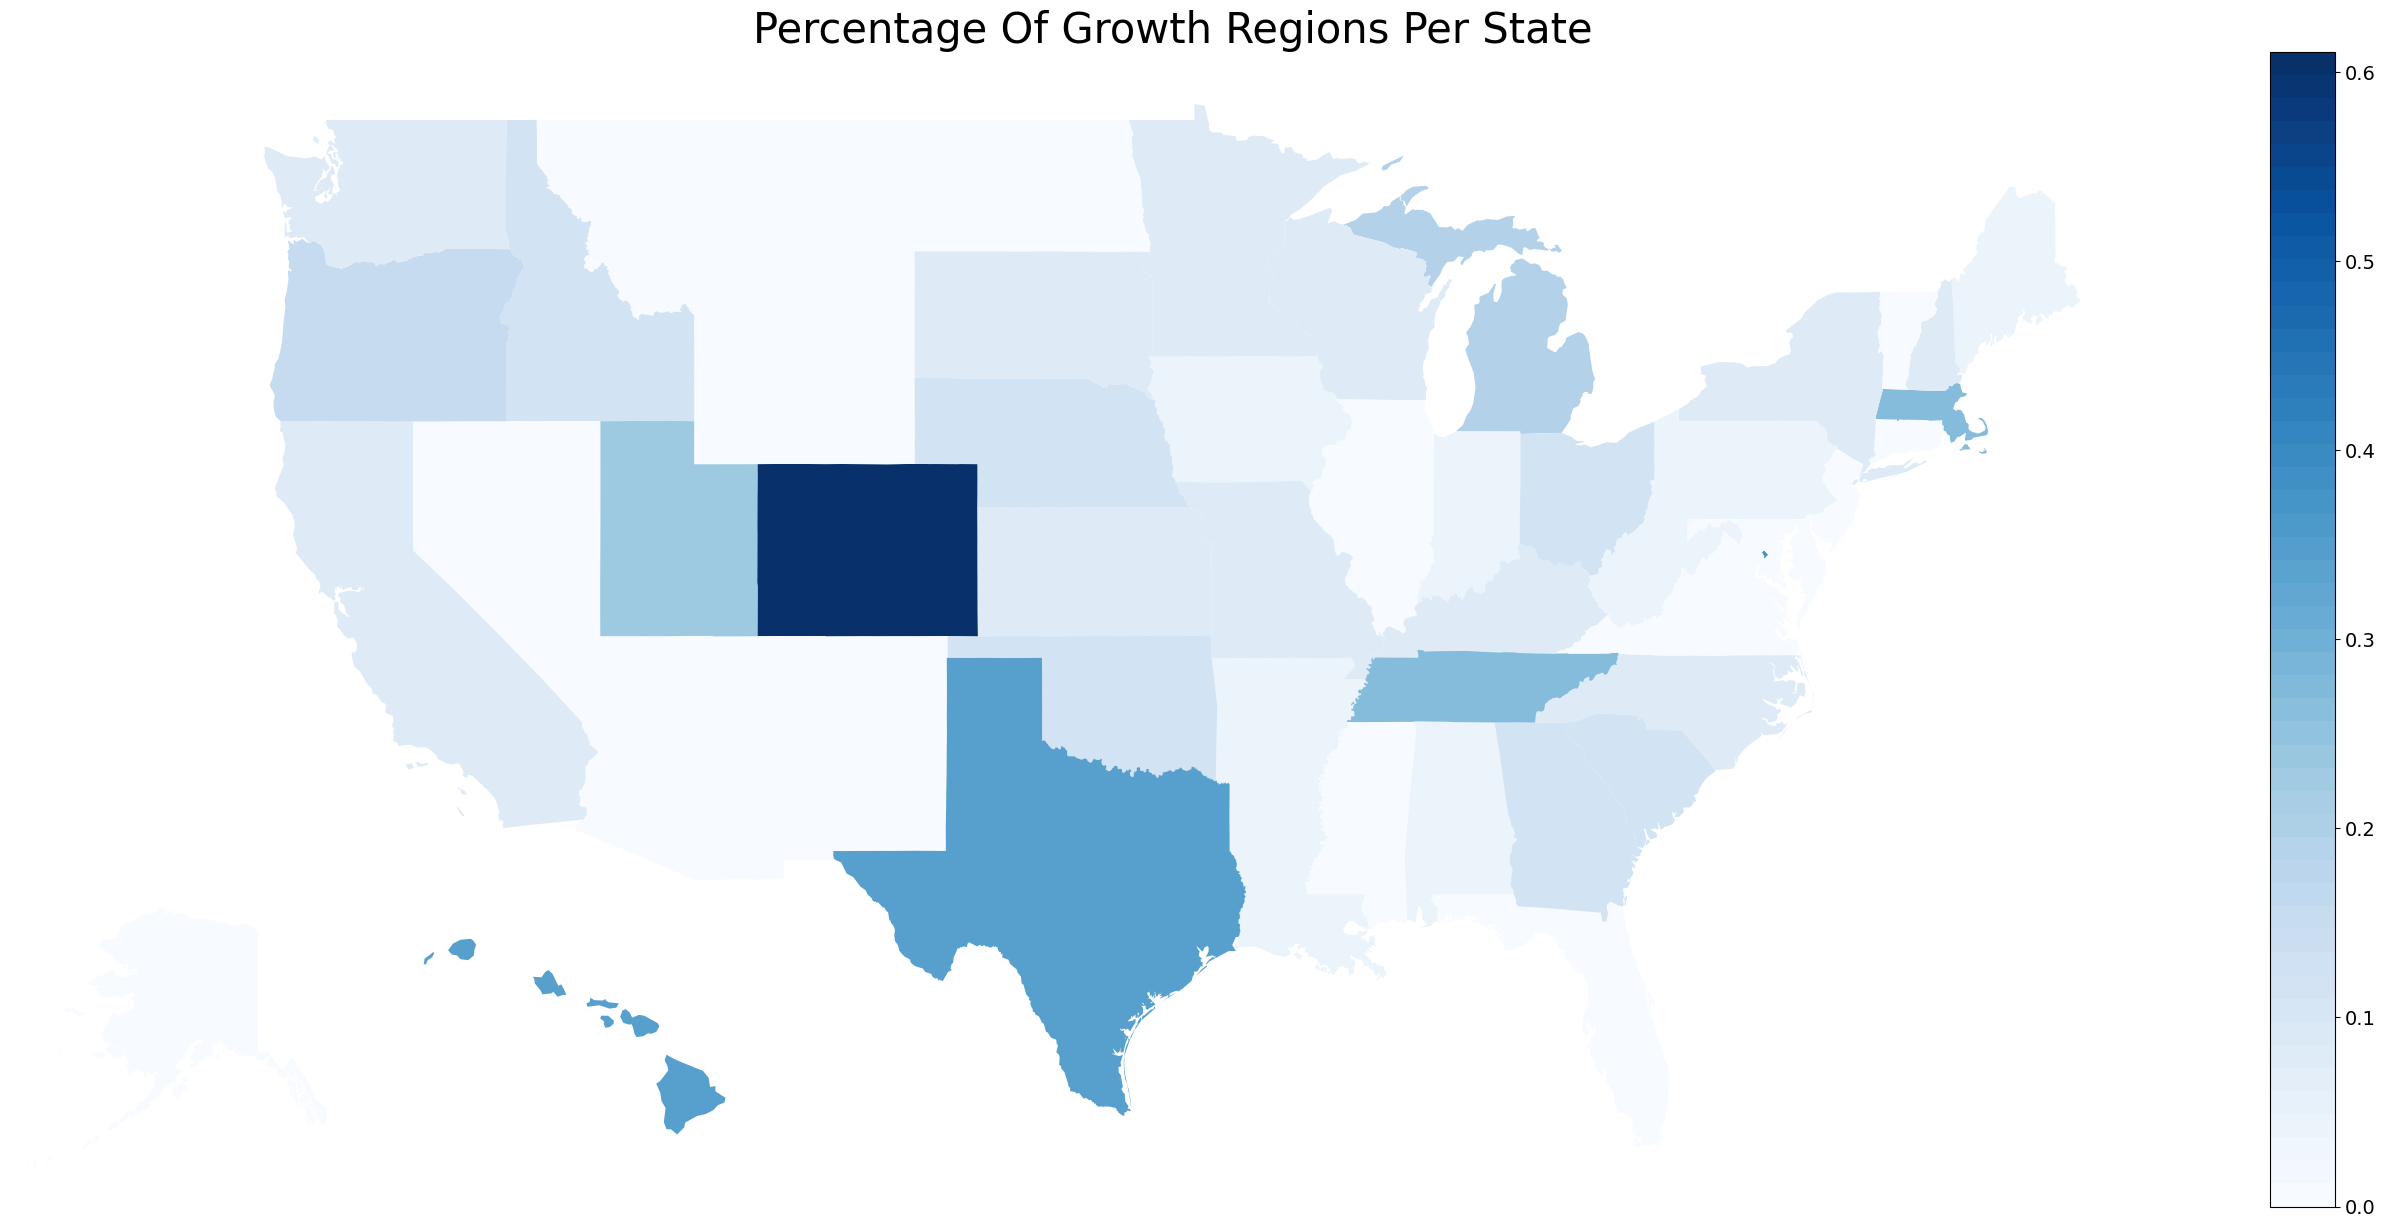

In [99]:
# Creating column that shows share of growth regions in each state:
states_data['%GrowthRegions'] = states_data['#GrowthRegions'] / states_data['RegionCount']

# Plotting percentages of growth regiongs on a map:
state_map(metric = '%GrowthRegions', title = 'Percentage Of Growth Regions Per State', 
          grad = colorscale, annot=False, pacific=True)


When looking across all states, it looks like Colorado, Utah, Texas, and North Dakota have the highest percentage of growth regions compared to the total number of regions in each state. 

Now that we have explored our data quite a bit, it is time to move into modeling our data so that we can determine which 5 zipcodes are the best to invest in. However, there is one last step we need to take to reformat our data to be usable by the model. Right now, Our data is in Wide format, meaning that each different date is a separate column. Therefore the data only makes sense if you know the name of the column that the data can be found in, which is not helpful when we have metadata like we do here. To fix this problem, I will reformat the data into Long format, which will create one row for each unique time and zipcode combination in the data.

# Step 4: Reshape from Wide to Long Format
We will start by creating a function that will reshape my data from wide to long format, utilizing pandas .melt() function. We will be using this format to check for any trends in our data, and will be using a slightly different format later on for our modeling. Trends can affect the accuracy of our modelling, so we need to know if we have any trends to know whether or not we need to use a model that removes trends. The two things we will look at are if the data has seasonality and if it has stationarity.


Firstly we will change the shape of data, we will remove columns that are not important and then we will check for any trends in the data.

In [100]:
# Creating a function to change shape of the data from columns to rows data:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName','City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [101]:
data_growth.drop(data_growth.iloc[:,8:200], inplace = True, axis = 1)

#Drop the RegionID, SizeRank, and GrowthRegion columns which do not have relevant information for our analysis"
data_growth = data_growth.drop(columns=['RegionID','SizeRank','GrowthRegion'])

# Check the columns were properly dropped:
data_growth.head()
#len(data_growth.columns)

,RegionName,State,City,Metro,CountyName,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,...,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00
2,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,161161.084317,162276.841879,163237.802682,164245.706668,165133.171372,...,283864.948365,281434.776942,279092.679058,277234.960535,276040.337909,275560.590268,275939.451372,276700.188180,277596.655001,278130.312100
3,11368,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,386832.878457,392934.846589,396878.984965,400786.176104,403863.437296,...,503622.567716,498054.569558,491140.641900,484774.625546,478103.650835,470951.343102,465519.157578,463684.283059,463678.295654,463117.230849
4,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,159131.942458,160259.648164,161153.282642,161936.272979,162643.716618,...,274632.995125,273073.699280,271477.156735,270153.639535,269362.402315,269219.891252,269817.371906,270660.259532,271532.872461,271960.685440
6,11385,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,578728.440042,586542.972615,592959.329359,599502.096640,605709.458578,...,792598.550141,791168.189051,789435.769889,788261.159092,789847.294963,791681.947219,792485.705980,791878.833855,790752.972538,788784.963654
7,78660,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,224294.586833,226553.666937,228392.793352,230032.305314,231540.715703,...,437707.124468,429922.620221,423315.285033,418022.715750,414228.424361,411789.097841,410718.728117,409767.840754,408502.739189,406655.196648


In [102]:
# Apply the above function to transform the shape of data
model_data = melt_data(data_growth)
model_data.head()

,value
time,
2016-01-01,314479.092843
2016-02-01,317097.077343
2016-03-01,319185.410595
2016-04-01,320864.237377
2016-05-01,322120.139104


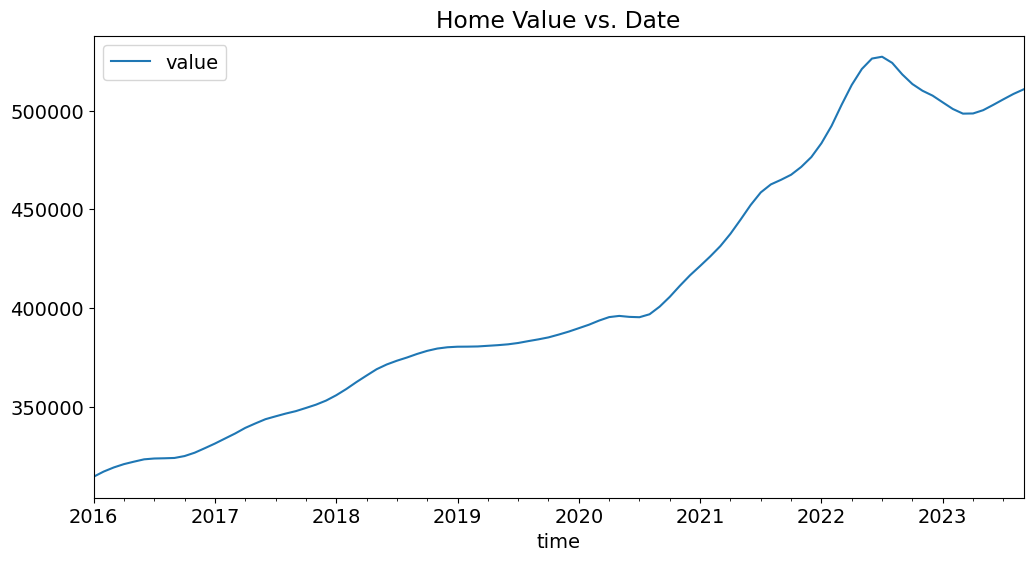

In [103]:
# Plotting the data from 2016 till 2023
model_data.plot(figsize=(12,6))
plt.title('Home Value vs. Date');

Now we have our data in the rows format long. It looks like we have a steady upward trend in home prices since 2016. Before we are able to model, we first need to check if our time series has any trends. Trends can affect the accuracy of our modelling, and will need to be removed if present. The two things we will look at are if the data has seasonality and if it has stationarity.

##### Seasonality
If our data has a seasonality trend then we would need to remove this trend prior to modelling. We can see from the plot above that there are no recurring spikes in our graph, indicating that we don't have any seasonality over here.

##### Stationarity
A time series has stationarity if its statistical properties (i.e. mean variance, etc.) remain constant over time. Most models need stationarity to run properly. To see if our data has any stationarity, We will use the rolling statistics method, which will plot the moving average and variance to see if it varies over the time. If variation is there that means our data does not have stationarity which will need to be dealt with prior to modeling. We will also use the Dickey-Fuller test to check statistically if we have stationarity. We will build a function that runs both of these methods so that it is easy to re-use later.

In [104]:
def stationarity_check(df):
    '''
    This function will chart the results from the rolling statistics method to visualize if we have stationarity.
    It will then run a Dickey_fuller test to see if stationarity exists from a statistical standpoint.
    Parameters:
    df - data we want to test
    '''
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_std = df.rolling(window=8, center=False).std()
    roll_mean = df.rolling(window=8, center=False).mean()
 
    dftest = adfuller(df['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(roll_mean, color='black', label='Rolling Mean')
    plt.plot(roll_std, color='red', label = 'Rolling Std')
    plt.plot(df, color='green',label='Original')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             'no. of Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

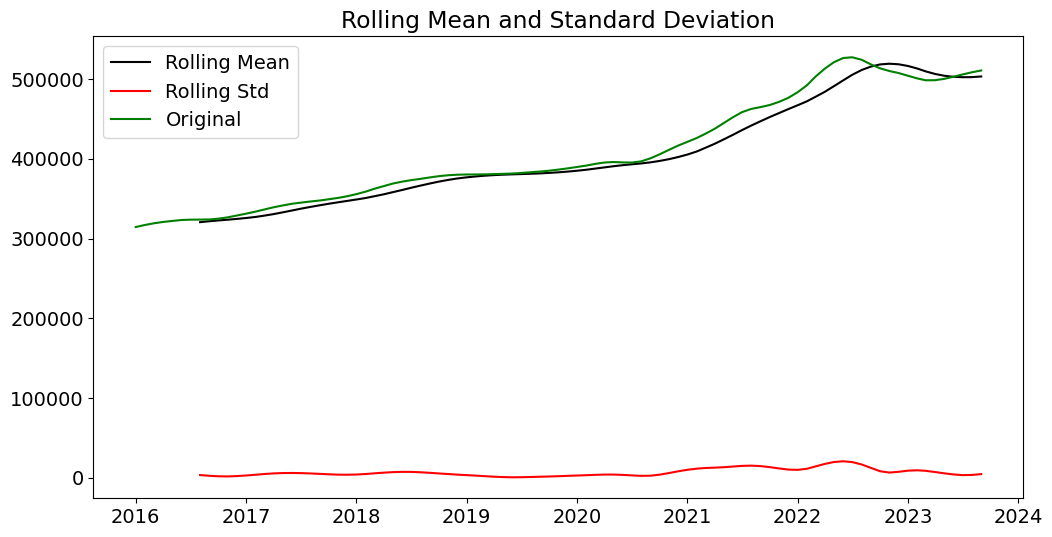

Results of Dickey-Fuller Test: 

Test Statistic                 -0.557064
p-value                         0.880392
no. of Lags Used                9.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [105]:
# Run stationarity_check function:
stationarity_check(model_data)

We can see that the rolling mean is not constant over time and we have high p-value that is greater than our desired 5 percent critical value,means that our data does not have stationarity. This means our data has a trend that will need to be removed.<br>
[FUTURE WORK]
ARIMA model is a model version that can remove trends for us so that we do not have to do so separately. The ARIMA model will use differencing to remove the trends in our data prior to modeling.

In [106]:
import pandas as pd

def regions_dataframe(regions, start='2012-04', end='2018-04', data=data):
  # Use '%Y-%m' if no day component

    if type(regions) != list:
        regions = [regions]

    # Convert start and end to datetime, handling the case where only year and month are provided
    start = pd.to_datetime(start, format='%Y-%m')  # Use '%Y-%m' if no day component
    end = pd.to_datetime(end, format='%Y-%m')
    data_temp = data.loc[data['RegionName'].isin(regions)]
    data_temp['RegionName'] = data_temp['RegionName'].astype(str)
    data_temp.set_index(['RegionName'], inplace=True)

    # Assuming non-date columns are at the beginning
    num_non_date_columns = 3  # Adjust based on your dataset
    date_columns = data_temp.columns[num_non_date_columns:]

    # Convert column names to datetime for comparison
    converted_date_columns = pd.to_datetime(date_columns, format='%Y-%m-%d', errors='coerce')

    # Filter columns based on the start and end dates
    relevant_columns = [col for col, converted_col in zip(date_columns, converted_date_columns) if pd.notna(converted_col) and start <= converted_col <= end]
    data_temp = data_temp[relevant_columns].T
    data_temp.index.name = 'Date'
    data_temp.reset_index(inplace=True)
    data_temp.set_index('Date', inplace=True)

    return data_temp


## Done by Uday Bhaskar Voora

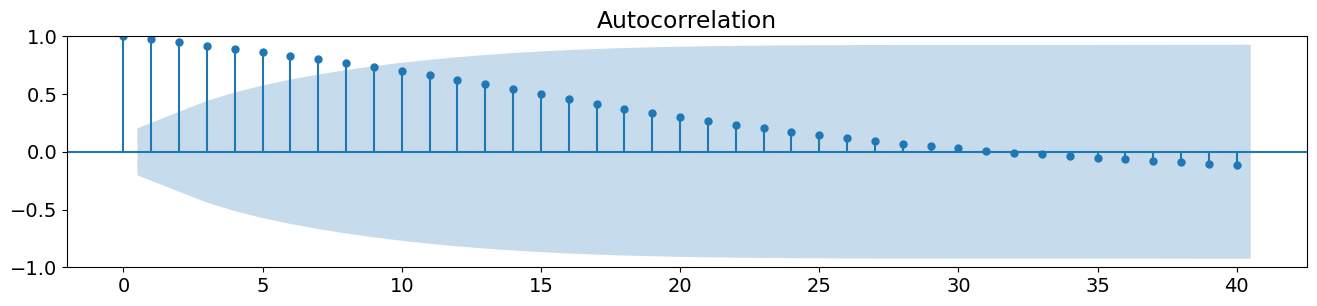

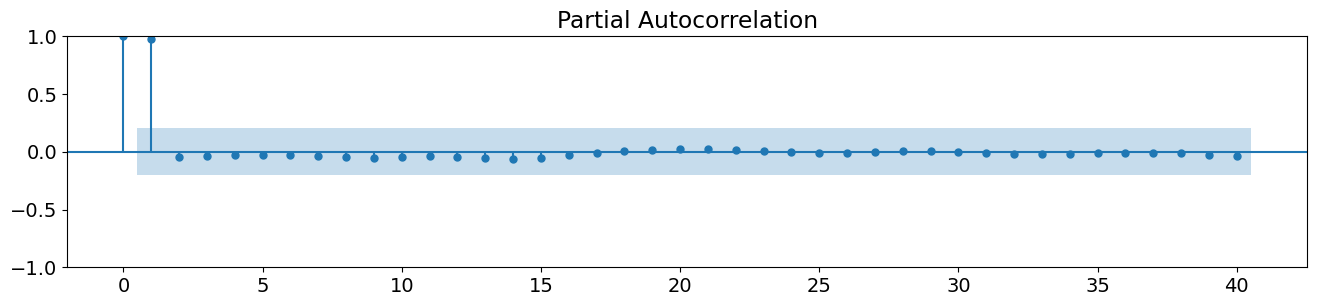

In [107]:
# Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(model_data,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(model_data,ax=ax, lags=40);

In [108]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import logging

# Define the parameters for the ARIMA model
p = q = d = [0, 1, 2]
d = [0, 1]

# Create a list with all possible combinations of these 3 parameters
combs = list(itertools.product(p, d, q))


def arima_selection(dataset, combs, split=0.7):
    limit = int(len(dataset) * split)
    train = dataset.iloc[:limit]
    test = dataset.iloc[limit:]

    best_rmse = float('inf')
    best_model = None
    best_order = None

    for order in combs:
        try:
            # Ensure the time series has a frequency for ARIMA to work properly
            if train.index.inferred_freq is None:
                train = train.asfreq('MS')
                test = test.asfreq('MS')

            model = ARIMA(train, order=order)
            output = model.fit()
            # Forecast the next len(test) periods
            pred = output.get_forecast(steps=len(test)).predicted_mean

            # Ensure that test and pred are series and have the same length
            if len(test) != len(pred):
                raise ValueError(f"Prediction and test series length mismatch: {len(pred)} != {len(test)}")
            
            rmse = mean_squared_error(test, pred, squared=False)  # squared=False to get RMSE directly

            if rmse < best_rmse:
                best_order = order
                best_rmse = rmse
                best_model = output

        except Exception as e:
            logging.error(f"Error with ARIMA model for order {order}: {e}")
            continue

    return best_order, best_model
def arima_forecast(output, periods):
    # Get forecast of specified periods ahead
    forecast_results = output.get_forecast(steps=periods)
    
    # Get the forecasted mean
    forecast_mean = forecast_results.predicted_mean
    
    # Get the confidence intervals for the forecast
    conf_int = forecast_results.conf_int()
    
    # Split lower and upper confidence bounds
    lower = conf_int.iloc[:, 0]
    upper = conf_int.iloc[:, 1]

    return forecast_mean, lower, upper


def arima_output(region, start='2012-04-01', periods=120, split=0.7, combs=combs):
    df = regions_dataframe(region, start=start)  # Ensure this function is defined
    order, output = arima_selection(dataset=df, combs=combs, split=split)

    if order is None:
        return None
    else:
        forecast, lower, upper = arima_forecast(output, periods)
        state = data.loc[data['RegionName'] == region]['State'].item()
        county = data.loc[data['RegionName'] == region]['CountyName'].item()

        return pd.DataFrame({
            'RegionName': [region],
            'County': [county],
            'State': [state],
            'Order': [order],
            'FittedModel': [output],
            'Forecast': [forecast],
            'Lower': [lower],
            'Upper': [upper]
        })

def arima_dataframe(regions, start='2012-04', periods=120, split=0.7, combs=combs):
    all_region_dfs = []
    for i in regions:
        region_df = arima_output(i, start=start, periods=periods, split=split)
        if region_df is not None:
            all_region_dfs.append(region_df)

    return pd.concat(all_region_dfs, ignore_index=True)

# Example usage
# regions = ['77494', '8701', ...]  # Replace with actual region codes
# arima_df = arima_dataframe(regions)


In [109]:
# Create Dataframe with data from the above modelling functions
"""import pickle
arima_data = arima_dataframe(strong_growth_regions)

# Pickle out the data
with open('arima_data.pickle', 'wb') as f:
    pickle.dump(arima_data, f, pickle.HIGHEST_PROTOCOL)"""

"import pickle\narima_data = arima_dataframe(strong_growth_regions)\n\n# Pickle out the data\nwith open('arima_data.pickle', 'wb') as f:\n    pickle.dump(arima_data, f, pickle.HIGHEST_PROTOCOL)"

In [110]:
# Use pickle to collect the previously run data:
import pickle
with open('arima_data.pickle', 'rb') as file:
    arima_data = pickle.load(file)

# Reset the index and take a look at our dataframe:
arima_data.reset_index(inplace=True, drop=True)
arima_data.head()

,RegionName,County,State,Order,FittedModel,Forecast,Lower,Upper
0,77449,Harris County,TX,"(2, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 166716.232191 2016-08-01 1673...,2016-07-01 166478.249283 2016-08-01 1669...,2016-07-01 166954.215098 2016-08-01 1677...
1,11368,Queens County,NY,"(2, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 409858.538962 2016-08-01 4123...,2016-07-01 407849.305510 2016-08-01 4095...,2016-07-01 411867.772414 2016-08-01 4152...
2,77084,Harris County,TX,"(1, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 164068.267713 2016-08-01 1646...,2016-07-01 163890.622251 2016-08-01 1642...,2016-07-01 164245.913176 2016-08-01 1650...
3,11385,Queens County,NY,"(1, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 6.169574e+05 2016-08-01 6.210...,2016-07-01 6.115177e+05 2016-08-01 6.133...,2016-07-01 6.223972e+05 2016-08-01 6.287...
4,78660,Travis County,TX,"(2, 0, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 234787.940032 2016-08-01 2363...,2016-07-01 234430.738939 2016-08-01 2355...,2016-07-01 235145.141125 2016-08-01 2371...


In [111]:
# Extract p-values from FittedModel column and add them to a new column:
arima_data['P-Values'] = arima_data['FittedModel'].map(lambda x: x.pvalues)

# Remove regions where a model was unable to be fit:
arima_data.dropna(inplace=True)

In [112]:
# Add in columns for average annual growth rate of 5 years and 10 years:
arima_data['Annual_5y_GrowthRate'] = arima_data['Forecast'].map(lambda x: (((x[59]/x[0])**(1/5))-1)*100)
arima_data['Annual_10y_GrowthRate'] = arima_data['Forecast'].map(lambda x: (((x[-1]/x[0])**(1/10))-1)*100)

# Add in column to evaluate the difference in home values forecasted in 10 years compared to now:
arima_data['Growth_Over_10yrs'] = arima_data['Forecast'].map(lambda x: x[-1] - x[0])

# Sort data in descending order based on the average annual growth rate over 10 years:
arima_data.sort_values('Annual_10y_GrowthRate', ascending=False).head()

,RegionName,County,State,Order,FittedModel,Forecast,Lower,Upper,P-Values,Annual_5y_GrowthRate,Annual_10y_GrowthRate,Growth_Over_10yrs
1947,80650,Weld County,CO,"(1, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 237206.531166 2016-08-01 2400...,2016-07-01 235804.051929 2016-08-01 2380...,2016-07-01 238609.010403 2016-08-01 2421...,ar.L1 0.000000e+00 ma.L1 0.000000e+00 ...,11.423387,9.361300,3.432414e+05
1738,80644,Weld County,CO,"(2, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 258692.259897 2016-08-01 2615...,2016-07-01 257586.343446 2016-08-01 2599...,2016-07-01 259798.176349 2016-08-01 2631...,ar.L1 0.000000e+00 ar.L2 0.000000e+00 ...,10.443510,8.673308,3.356167e+05
1522,80514,Weld County,CO,"(2, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 271368.809410 2016-08-01 2742...,2016-07-01 269621.504290 2016-08-01 2717...,2016-07-01 273116.114529 2016-08-01 2766...,ar.L1 0.000000e+00 ar.L2 4.325928e-45 ...,10.082416,8.416051,3.374608e+05
181,80011,Arapahoe County,CO,"(2, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 229666.851819 2016-08-01 2320...,2016-07-01 228243.755122 2016-08-01 2300...,2016-07-01 231089.948516 2016-08-01 2340...,ar.L1 9.049102e-300 ar.L2 6.107201e-0...,9.981816,8.342806,2.821318e+05
417,94061,San Mateo County,CA,"(1, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 1.317367e+06 2016-08-01 1.330...,2016-07-01 1.312315e+06 2016-08-01 1.323...,2016-07-01 1.322420e+06 2016-08-01 1.337...,ar.L1 0.000000 ma.L1 0.000000 ma.L2 ...,9.836223,8.224096,1.586298e+06


In [113]:
# Create function to filter out regions with non-statistically-significant p-values:
def max_no_na(x):
    if len(list(x.dropna())) == 0:
        return None
    else:
        return max(list(x.dropna()))

# Add maximum p-value as it's own column to the dataframe:
arima_data['Max_P-Value'] = arima_data['P-Values'].map(lambda x: max_no_na(x))
arima_data.head()

,RegionName,County,State,Order,FittedModel,Forecast,Lower,Upper,P-Values,Annual_5y_GrowthRate,Annual_10y_GrowthRate,Growth_Over_10yrs,Max_P-Value
0,77449,Harris County,TX,"(2, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 166716.232191 2016-08-01 1673...,2016-07-01 166478.249283 2016-08-01 1669...,2016-07-01 166954.215098 2016-08-01 1677...,ar.L1 0.000000e+00 ar.L2 0.000000e+00 ...,0.746257,0.372954,6323.140856,2.676515e-80
1,11368,Queens County,NY,"(2, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 409858.538962 2016-08-01 4123...,2016-07-01 407849.305510 2016-08-01 4095...,2016-07-01 411867.772414 2016-08-01 4152...,ar.L1 2.519382e-01 ar.L2 0.000000e+00 ...,6.570298,5.790618,309765.298687,9.932597e-01
2,77084,Harris County,TX,"(1, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 164068.267713 2016-08-01 1646...,2016-07-01 163890.622251 2016-08-01 1642...,2016-07-01 164245.913176 2016-08-01 1650...,ar.L1 0.000000e+00 sigma2 7.036046e-73 ...,0.458817,0.229165,3798.874814,7.036046e-73
3,11385,Queens County,NY,"(1, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 6.169574e+05 2016-08-01 6.210...,2016-07-01 6.115177e+05 2016-08-01 6.133...,2016-07-01 6.223972e+05 2016-08-01 6.287...,ar.L1 0.0 ma.L1 0.0 sigma2 0.0 dtyp...,6.827100,5.989883,486865.279725,0.000000e+00
4,78660,Travis County,TX,"(2, 0, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 234787.940032 2016-08-01 2363...,2016-07-01 234430.738939 2016-08-01 2355...,2016-07-01 235145.141125 2016-08-01 2371...,const 0.000000 ar.L1 0.000000 ar.L2 ...,-0.946724,-3.791762,-75274.093033,5.777830e-01


In [114]:
def predicted_interval_width(region):
    
    '''
    Given a region, calculates the difference between the upper and lower bounds (at a 95% confidence interval)
    in the last forecasted time period.
    '''
    
    # Select data corresponding to the desired region:
    desired_region = arima_data.loc[arima_data['RegionName']==region]

    # Select the lower and upper bounds for the last forecasted period:
    lower_bound = desired_region['Lower'].item()[-1]
    upper_bound = desired_region['Upper'].item()[-1]
    
    # Return the difference between upper and lower bounds:
    return (upper_bound - lower_bound)

# Add column to dataframe with the width of the predicted bounds:
arima_data['PredictedWidth'] = arima_data['RegionName'].map(
    lambda x: predicted_interval_width(x))
arima_data.head()

,RegionName,County,State,Order,FittedModel,Forecast,Lower,Upper,P-Values,Annual_5y_GrowthRate,Annual_10y_GrowthRate,Growth_Over_10yrs,Max_P-Value,PredictedWidth
0,77449,Harris County,TX,"(2, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 166716.232191 2016-08-01 1673...,2016-07-01 166478.249283 2016-08-01 1669...,2016-07-01 166954.215098 2016-08-01 1677...,ar.L1 0.000000e+00 ar.L2 0.000000e+00 ...,0.746257,0.372954,6323.140856,2.676515e-80,29716.158953
1,11368,Queens County,NY,"(2, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 409858.538962 2016-08-01 4123...,2016-07-01 407849.305510 2016-08-01 4095...,2016-07-01 411867.772414 2016-08-01 4152...,ar.L1 2.519382e-01 ar.L2 0.000000e+00 ...,6.570298,5.790618,309765.298687,9.932597e-01,64275.390653
2,77084,Harris County,TX,"(1, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 164068.267713 2016-08-01 1646...,2016-07-01 163890.622251 2016-08-01 1642...,2016-07-01 164245.913176 2016-08-01 1650...,ar.L1 0.000000e+00 sigma2 7.036046e-73 ...,0.458817,0.229165,3798.874814,7.036046e-73,25439.455272
3,11385,Queens County,NY,"(1, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 6.169574e+05 2016-08-01 6.210...,2016-07-01 6.115177e+05 2016-08-01 6.133...,2016-07-01 6.223972e+05 2016-08-01 6.287...,ar.L1 0.0 ma.L1 0.0 sigma2 0.0 dtyp...,6.827100,5.989883,486865.279725,0.000000e+00,162417.299971
4,78660,Travis County,TX,"(2, 0, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,2016-07-01 234787.940032 2016-08-01 2363...,2016-07-01 234430.738939 2016-08-01 2355...,2016-07-01 235145.141125 2016-08-01 2371...,const 0.000000 ar.L1 0.000000 ar.L2 ...,-0.946724,-3.791762,-75274.093033,5.777830e-01,134710.242960


In [115]:
# Identify the regions that fall into each of the different parameters:
top25_5yr = arima_data['Annual_5y_GrowthRate'].quantile(.75)
top25_10yr = arima_data['Annual_10y_GrowthRate'].quantile(.75)
top50_width = arima_data['PredictedWidth'].quantile(.5)

# Identify which 5 regions are our 'best regions':
best_regions = list(arima_data.loc[(arima_data['Annual_5y_GrowthRate'] > top25_5yr) &
                                 (arima_data['Annual_10y_GrowthRate'] > top25_10yr) &
                                 (arima_data['PredictedWidth'] < top50_width) &
                                 (arima_data['Max_P-Value'] < 0.05)].sort_values(
    'Growth_Over_10yrs', ascending=False)['RegionName'][:5])

# Print a list of the best 5 regions along with their zip codes.
for i in best_regions:
    print(list(arima_data.loc[arima_data['RegionName'] == i, 'County']),i)

['Denver County'] 80205
['Denver County'] 80212
['Weld County'] 80644
['Jefferson County'] 80403
['Jefferson County'] 80215


In [116]:
def plot_forecasts(regions, labels=None, plot_width=True,
                   start='2012-04', months=120, size=(16,10)):    
    '''
    Given a list of regions, plot their actual values for a desired number of periods along with their 
    future predicted values for a desired number of periods
    
    Parameters:
    - regions - list of region(s) to plot 
    - labels - region names for the legend
    - plot_width - if True plots the width of the forecast
    - start - first date we want to include
    - months - # of forecasted months to include
    - size - size of the plot
    '''
    
    # If single region provided, convert it to a list:
    if type(regions) != list:
        regions = [regions]
    
    # Create a plot figure:
    plt.figure(figsize=size)
    
    # Create a color counter:
    counter=0
    
    # Iterate through each region and plot the desired values:
    for i in regions:
        # Select the real values from past years:
        data_real = regions_dataframe(i).iloc[:-7,:]
        x_real = list(data_real.index)
        y_real = data_real

        # Indicate how long the x axis needs to be for the forecasts:
        x_length = pd.date_range('2017-10-01', periods=months, freq='MS')
        
        # Identify the desired region:
        region_i = arima_data.loc[arima_data['RegionName']==i]
        
        # Specify the label to be associated with that region:
        if labels == None:
            label = f"{region_i['County'].item()} County, {region_i['State'].item()} ({region_i['RegionName'].item()})"
        else:
            label = f"{labels[counter]}, {region_i['State'].item()}"
        
        # Select the region's forecasted values:
        y_forecast = region_i['Forecast'].item()[:months]

        # Identify the color to be used for each region:
        color = color_list[counter]
        
        # Plot the real and forecasted values:
        plt.plot(x_real, y_real, color=color, label = label, lw = 4)
        plt.plot(x_length,y_forecast, color=color, ls='--', label = '', lw = 4)
        
        # If showing the interval widths, plot the bounds and shade between them:
        if plot_width==True:
            lower = region_i['Lower'].item()[:months]
            upper = region_i['Upper'].item()[:months]
            plt.fill_between(x_length, lower, upper,
                 facecolor=color, alpha = 0.15, interpolate=True)
        
        # Add 1 to the counter so a new color is chosen for the next region:
        counter += 1

    # Plot labels and axis limits:
    plt.title('Housing Price Forecasts and Bounds')
    plt.xlabel('Year')
    plt.ylabel('Avearge House Prices in Region ($)');
    
    plt.xlim(pd.to_datetime('2012-04', format='%Y-%m'),x_length[-1])
    plt.ylim(0,)

    plt.legend(loc=2, fontsize=14, frameon=True);

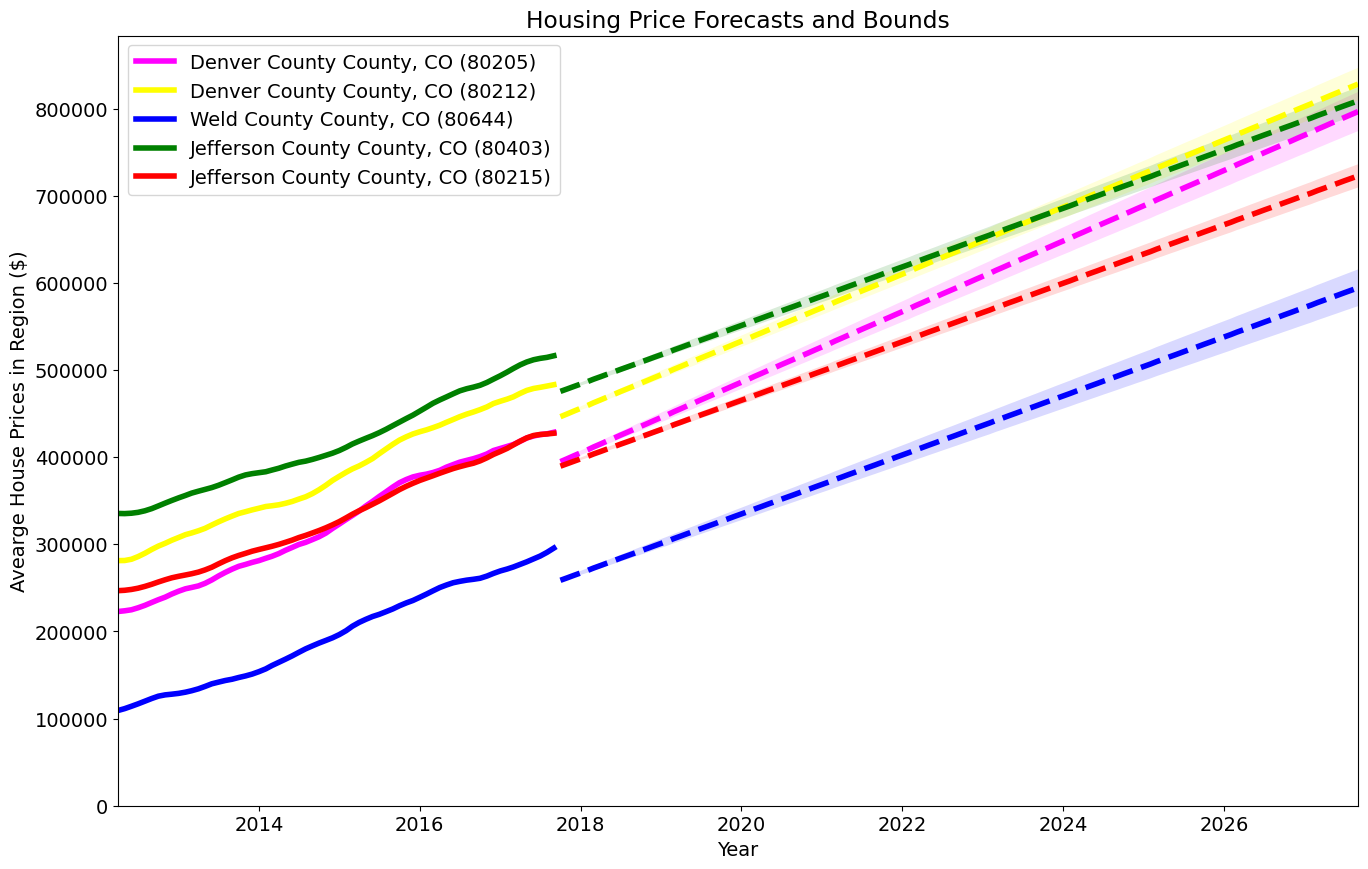

In [117]:
# Plot our 5 best regions:
plot_forecasts(best_regions)

In [118]:
# Calculate 10 year absolute growth and percentage growth for these 5 regions:
for i in best_regions:
        print('Region:',i,'-->', '10 Year Absolute Growth:','$',
              arima_data.loc[arima_data['RegionName'] == i]['Growth_Over_10yrs'].values,
             '-->', '10 Year Annual Growth Rate:',
              arima_data.loc[arima_data['RegionName'] == i]['Annual_10y_GrowthRate'].values, '%')

Region: 80205 --> 10 Year Absolute Growth: $ [401691.12079622] --> 10 Year Annual Growth Rate: [7.270031] %
Region: 80212 --> 10 Year Absolute Growth: $ [381616.46505708] --> 10 Year Annual Growth Rate: [6.37280625] %
Region: 80644 --> 10 Year Absolute Growth: $ [335616.74720771] --> 10 Year Annual Growth Rate: [8.67330816] %
Region: 80403 --> 10 Year Absolute Growth: $ [333357.12598963] --> 10 Year Annual Growth Rate: [5.45640034] %
Region: 80215 --> 10 Year Absolute Growth: $ [333043.04409292] --> 10 Year Annual Growth Rate: [6.37194372] %


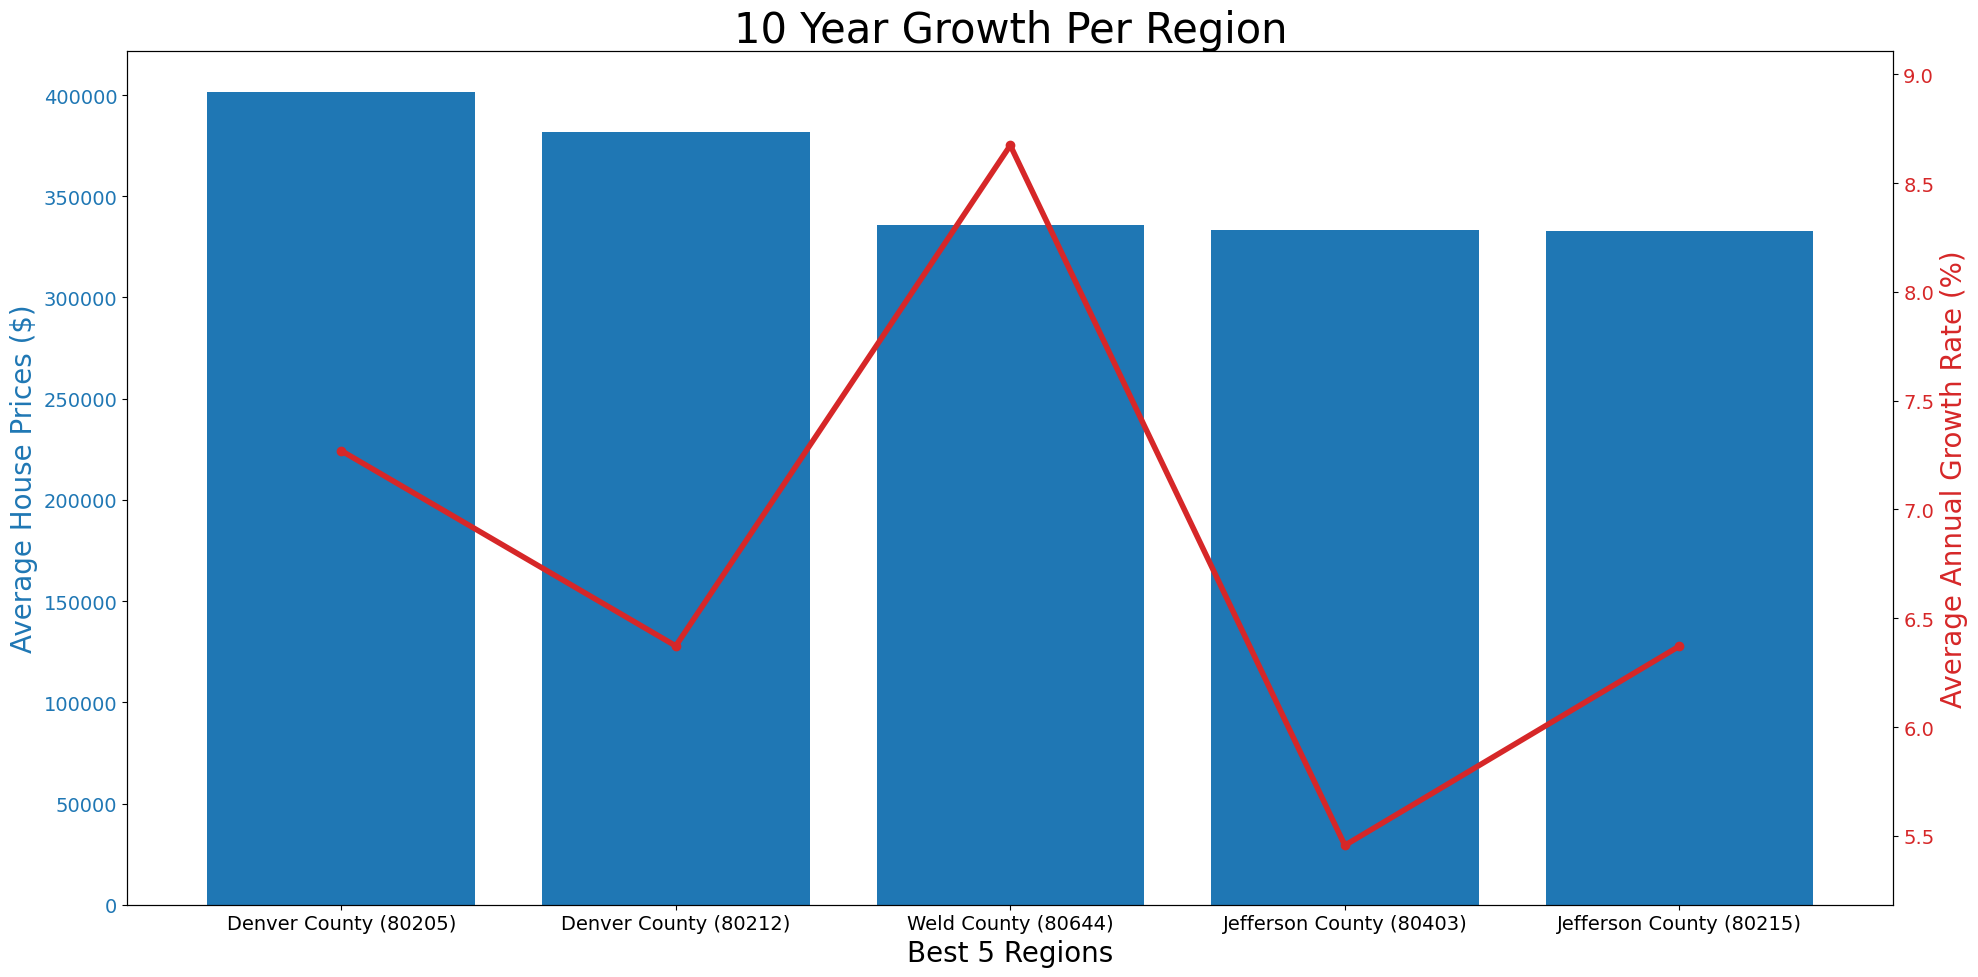

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Create dataframe with the necessary data for the best 5 regions
best_regions_cols = {
    'Region': ['Denver County (80205)', 'Denver County (80212)', 'Weld County (80644)',
               'Jefferson County (80403)', 'Jefferson County (80215)'],
    '10_Year_Absolute_Growth': [401691.12079622, 381616.46505708, 335616.74720771, 333357.12598963, 333043.04409292],
    '10_Year_Growth_Rate': [7.270031, 6.37280625, 8.67330816, 5.45640034, 6.37194372]
}
best_regions_df = pd.DataFrame(data=best_regions_cols)

# Initiate figure
fig, ax1 = plt.subplots(figsize=(20,10))

# Plot first y-axis of absolute 10 year growth:
color = 'tab:blue'
ax1.set_xlabel('Best 5 Regions', fontsize=20)
ax1.set_ylabel('Average House Prices ($)', color=color, fontsize=20)
ax1.bar(best_regions_df['Region'], best_regions_df['10_Year_Absolute_Growth'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Initiate second axis that shares the same x-axis:
ax2 = ax1.twinx() 

# Plot second y-axis with % growth:
color = 'tab:red'
ax2.set_ylabel('Average Annual Growth Rate (%)', color=color, fontsize=20)
line = ax2.plot(best_regions_df['Region'], best_regions_df['10_Year_Growth_Rate'], color=color, lw=4, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Dynamically adjust the y-axis of the second y-axis based on the data
y_min = min(best_regions_df['10_Year_Growth_Rate']) * 0.95
y_max = max(best_regions_df['10_Year_Growth_Rate']) * 1.05
ax2.set_ylim([y_min, y_max])

plt.title('10 Year Growth Per Region', fontsize=30)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [120]:
"""# Use pickle to collect the previously run data:
with open('arima_data.pickle', 'rb') as file:
    arima_data = pickle.load(file)

# Reset the index and take a look at our dataframe:
arima_data.reset_index(inplace=True, drop=True)
arima_data.head()"""

"# Use pickle to collect the previously run data:\nwith open('arima_data.pickle', 'rb') as file:\n    arima_data = pickle.load(file)\n\n# Reset the index and take a look at our dataframe:\narima_data.reset_index(inplace=True, drop=True)\narima_data.head()"

In [121]:
from statsmodels.tsa.arima.model import ARIMA


## Done by Uday Bhaskar Voora

In [122]:

your_time_series_data = pd.read_csv('C:/Users/udayv/Downloads/zillow_dataset_2023.csv')  # or any other way to load your data


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
file_path = 'C:/Users/udayv/Downloads/zillow_dataset_2023.csv'  # Change to your file path
df = pd.read_csv(file_path)

# Sample a smaller subset of the data, e.g., 5%
df_subset = df.sample(frac=0.05, random_state=42)

# Reshape the dataset to a long format
df_long = df_subset.melt(id_vars=['RegionName'], var_name='Date', value_name='Price', value_vars=df_subset.columns[9:])
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Convert 'RegionName' to string type
df_long['RegionName'] = df_long['RegionName'].astype(str)

# Handling missing values in 'Price'
df_long = df_long.dropna(subset=['Price'])

# Encoding categorical data (top N regions)
top_regions = df_long['RegionName'].value_counts().nlargest(10).index
df_long['RegionName'] = df_long['RegionName'].where(df_long['RegionName'].isin(top_regions), 'Other')
encoder = OneHotEncoder(sparse=True)
region_encoded = encoder.fit_transform(df_long[['RegionName']])

# Creating feature matrix (X) and target variable (y)
X = region_encoded
y = df_long['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, predictions_lr)
mae_lr = mean_absolute_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

# Print evaluation metrics for Linear Regression
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R2: {r2_lr}")


Linear Regression - MSE: 48967601152.64126, MAE: 131184.89189563465, R2: 0.002227552878216965


In [124]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lr})

# Reset index to make it easier to visualize
results_df = results_df.reset_index(drop=True)

# Print the DataFrame
print(results_df.head(20))  # Adjust the number of rows to display as needed


           Actual      Predicted
0   141682.434181  228465.271568
1   165342.165403  228465.271568
2    93533.023299  228465.271568
3   250465.970681  228465.271568
4   143827.711920  228465.271568
5   180841.257693  228465.271568
6   262189.684333  228465.271568
7    47996.594714  228465.271568
8    88132.889369  228465.271568
9   696011.139148  228465.271568
10  358759.390951  228465.271568
11   85633.261283  228465.271568
12  183841.837863  228465.271568
13   52667.038479  228465.271568
14  382266.489367  228465.271568
15  199660.765317  228465.271568
16  251550.979974  228465.271568
17   97708.641638  228465.271568
18  120436.577779  228465.271568
19   99423.729661  228465.271568
